# Imports

In [1]:
import random
import json
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import norm
from tqdm import tqdm
import pandas as pd
from tabulate import tabulate

%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Player.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Street.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Utility.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Station.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Chance.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Tax.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Go.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Jail.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\FreeParking.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\GoToJail.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\CommunityChest.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\MonopolyBoard.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\Strategy.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\Simulation Classes\\RandomStrategy.py"

%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\MonopolyBoardMCTS.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\Node.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\MCTS.py"
%run -i "C:\\Users\\cathe\\OneDrive\\Documents\\Capstone - Optimising Monopoly Gameplay Strategies\\MCTS\\State.py"

random.seed(42)

# Game Rollouts - Random Strategy

In [2]:
def game():
    # create board and add players
    board = MonopolyBoardMCTS()
    agent = Player('Agent')
    player = Player('Player')
    board.add_agent(agent)
    board.add_other_player(player)

    # using a random strategy
    strategy = RandomStrategy()
    board.strategy = strategy

    # run MCTS game
    root_state = State()
    root_state.from_monopoly_board(board)
    mcts = MCTS(root_state, max_iterations=500, exploration_weight=1, max_simulations=5)
    mcts.run_game(max_rounds=20)

    return mcts.root.state.rounds, mcts.root.state.agent, mcts.root.state.other_players[0], \
        mcts.root.state.properties, mcts.root.state.stations, mcts.root.state.utilities

In [ ]:
random.seed(42)
num_games = 1000
game_outcomes = {'Rounds': [], 'Agent': [], 'Other player(s)': [], 'Properties': [], 'Stations': [], 'Utilities': []}

for _ in range(num_games):
    rounds, agent, other_players, properties, stations, utilities = game()
    game_outcomes['Rounds'].append(rounds)
    game_outcomes['Agent'].append(agent)
    game_outcomes['Other player(s)'].append(other_players)
    game_outcomes['Properties'].append(properties)
    game_outcomes['Stations'].append(stations)
    game_outcomes['Utilities'].append(utilities)

In [ ]:
file_path = 'MCTS_RandomStrategy_MaxRounds20_1000_game_outcomes.json'
with open(file_path, 'w') as json_file:
    json.dump(game_outcomes, json_file, indent=4)

## Analysing Game Rollouts

In [2]:
file_path = 'MCTS_RandomStrategy_100_game_outcomes.json'
with open(file_path, 'r') as json_file:
    game_outcomes = json.load(json_file)

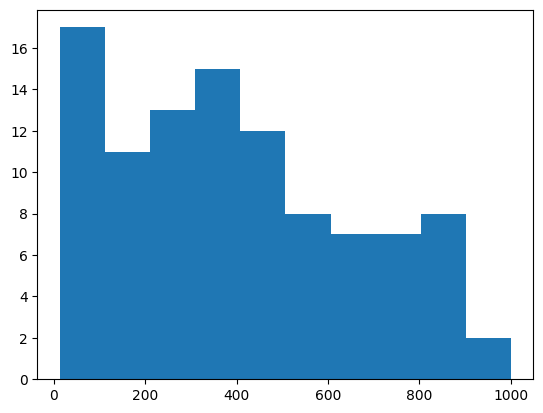

In [3]:
plt.hist(game_outcomes['Rounds'])
plt.show()

In [4]:
agent_losses = sum([agent[3] for agent in game_outcomes['Agent']])
agent_wins = sum([agent[3] for agent in game_outcomes['Other player(s)']])
game_not_ended = 100 - agent_losses - agent_wins

print(f'Out of 100 games with 2 players, run for 1000 decisions, using a random strategy, the agent won \n {agent_wins} games, the other player won {agent_losses} games. The other {game_not_ended} games did not end in this time period.')

Out of 100 games with 2 players, run for 1000 decisions, using a random strategy, the agent won 
 23 games, the other player won 3 games. The other 74 games did not end in this time period.


In [8]:
street_data = [
            ("Old Kent Road", 60, 50, 2, 10, 30, 90, 160, 250, 1, "brown", 2),
            ("Whitechapel Road", 60, 50, 4, 20, 60, 180, 320, 450, 3, "brown", 2),
            ("The Angel Islington", 100, 50, 6, 30, 90, 270, 400, 550, 6, "lightblue", 3),
            ("Euston Road", 100, 50, 6, 30, 90, 270, 400, 550, 8, "lightblue", 3),
            ("Pentonville Road", 120, 50, 8, 40, 100, 300, 450, 600, 9, "lightblue", 3),
            ("Pall Mall", 140, 100, 10, 50, 150, 450, 625, 750, 11, "pink", 3),
            ("Whitehall", 140, 100, 10, 50, 150, 450, 625, 750, 13, "pink", 3),
            ("Northumberland Avenue", 160, 100, 12, 60, 180, 500, 700, 900, 14, "pink", 3),
            ("Bow Street", 180, 100, 14, 70, 200, 550, 750, 950, 16, "orange", 3),
            ("Marlborough Street", 180, 100, 14, 70, 200, 550, 750, 950, 18, "orange", 3),
            ("Vine Street", 200, 100, 16, 80, 220, 600, 800, 1000, 19, "orange", 3),
            ("The Strand", 220, 150, 18, 90, 250, 700, 875, 1050, 21, "red", 3),
            ("Fleet Street", 220, 150, 18, 90, 250, 700, 875, 1050, 23, "red", 3),
            ("Trafalgar Square", 240, 150, 20, 100, 300, 750, 925, 1100, 24, "red", 3),
            ("Leicester Square", 260, 150, 22, 110, 330, 800, 975, 1150, 26, "yellow", 3),
            ("Coventry Street", 260, 150, 22, 110, 330, 800, 975, 1150, 27, "yellow", 3),
            ("Piccadilly", 280, 150, 24, 120, 360, 850, 1025, 1200, 29, "yellow", 3),
            ("Regent Street", 300, 200, 26, 130, 390, 900, 1100, 1275, 31, "green", 3),
            ("Oxford Street", 300, 200, 26, 130, 390, 900, 1100, 1275, 32, "green", 3),
            ("Bond Street", 320, 200, 28, 150, 450, 1000, 1200, 1400, 34, "green", 3),
            ("Park Lane", 350, 200, 35, 175, 500, 1100, 1300, 1500, 37, "darkblue", 2),
            ("Mayfair", 400, 200, 50, 200, 600, 1400, 1700, 2000, 39, "darkblue", 2)
        ]

In [17]:
# wealth: money, properties (mortgaged/unmortgaged + buildings)
agent_wealth = []
player_wealth = []

for idx in range(100):
    money_agent = game_outcomes['Agent'][idx][2]
    money_player = game_outcomes['Other player(s)'][idx][2]

    for idx, prop in enumerate(game_outcomes['Properties'][idx]):
        if prop[0] == 'Agent':
            if prop[3]:
                money_agent += street_data[idx][1]/2
            else:
                money_agent += street_data[idx][1]

            money_agent += street_data[idx][2] * (prop[1]+prop[2])

        elif prop[0] == 'Player':
            if prop[3]:
                money_player += street_data[idx][1]/2
            else:
                money_player += street_data[idx][1]

            money_player += street_data[idx][2] * (prop[1]+prop[2])

    agent_wealth.append(money_agent)
    player_wealth.append(money_player)

In [22]:
sum([agent_wealth[i] > player_wealth[i] for i in range(100)])

27

In [16]:
property_names = [
    "Old Kent Road",
    "Whitechapel Road",
    "The Angel Islington",
    "Euston Road",
    "Pentonville Road",
    "Pall Mall",
    "Whitehall",
    "Northumberland Avenue",
    "Bow Street",
    "Marlborough Street",
    "Vine Street",
    "Strand",
    "Fleet Street",
    "Trafalgar Square",
    "Leicester Square",
    "Coventry Street",
    "Piccadilly",
    "Regent Street",
    "Oxford Street",
    "Bond Street",
    "Park Lane",
    "Mayfair",
    "King's Cross Station",
    "Marylebone Station",
    "Fenchurch Street Station",
    "Liverpool Street Station",
    "Electric Company",
    "Water Works"
]

In [257]:
props_bought_player = [0]*28
props_bought_agent = [0]*28

for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx] += 0.01
        else:
            pass

for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+22] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx+22] += 0.01
        else:
            pass

for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+26] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx+26] += 0.01
        else:
            pass

In [258]:
def wilson_score_interval(p, n, z):
    z_squared = z**2
    phat = p + z_squared / (2 * n)
    margin_of_error = z * np.sqrt((p * (1 - p) / n) + z_squared / (4 * n))
    
    ci_lower = (phat - margin_of_error) / (1 + z_squared / n)
    ci_upper = (phat + margin_of_error) / (1 + z_squared / n)
    
    return ci_lower, ci_upper


In [259]:
def interval_property_plot(agent, player, ylabel, ylim0=0, ylim1=1):
    num_points = len(agent)
    ci_lower_props_bought_player = [0]*num_points
    ci_lower_props_bought_agent = [0]*num_points
    ci_upper_props_bought_player = [0]*num_points
    ci_upper_props_bought_agent = [0]*num_points

    z = norm.ppf(0.975)
    n = 100

    for idx, p in enumerate(player):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_player[idx] = ci_lower
        ci_upper_props_bought_player[idx] = ci_upper

    for idx, p in enumerate(agent):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_agent[idx] = ci_lower
        ci_upper_props_bought_agent[idx] = ci_upper

    x = range(num_points)
    plt.figure(figsize=(15, 8))

    vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5]
    for i in range(len(vertical_lines)):
        plt.axvline(vertical_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    if num_points > 22:
        vertical_lines = [21.5, 25.5]
        for i in range(len(vertical_lines)):
            plt.axvline(vertical_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    horizontal_lines = [0.2, 0.4, 0.6, 0.8]
    for i in range(len(horizontal_lines)):
        plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    plt.fill_between(x, ci_lower_props_bought_player, ci_upper_props_bought_player, color='lightblue', alpha=0.5)
    plt.fill_between(x, ci_lower_props_bought_agent, ci_upper_props_bought_agent, color='pink', alpha=0.5)
    plt.scatter(x, player, alpha = 0.5, color = 'blue', label = 'Player')
    plt.scatter(x, agent, alpha = 0.5, color = 'red', label = 'Agent')
        
    plt.xticks(x, property_names[:num_points], rotation = 90)
    plt.xlabel('Property')
    plt.ylabel(ylabel)
    
    plt.ylim(ylim0, ylim1)
    plt.legend()
    plt.show()

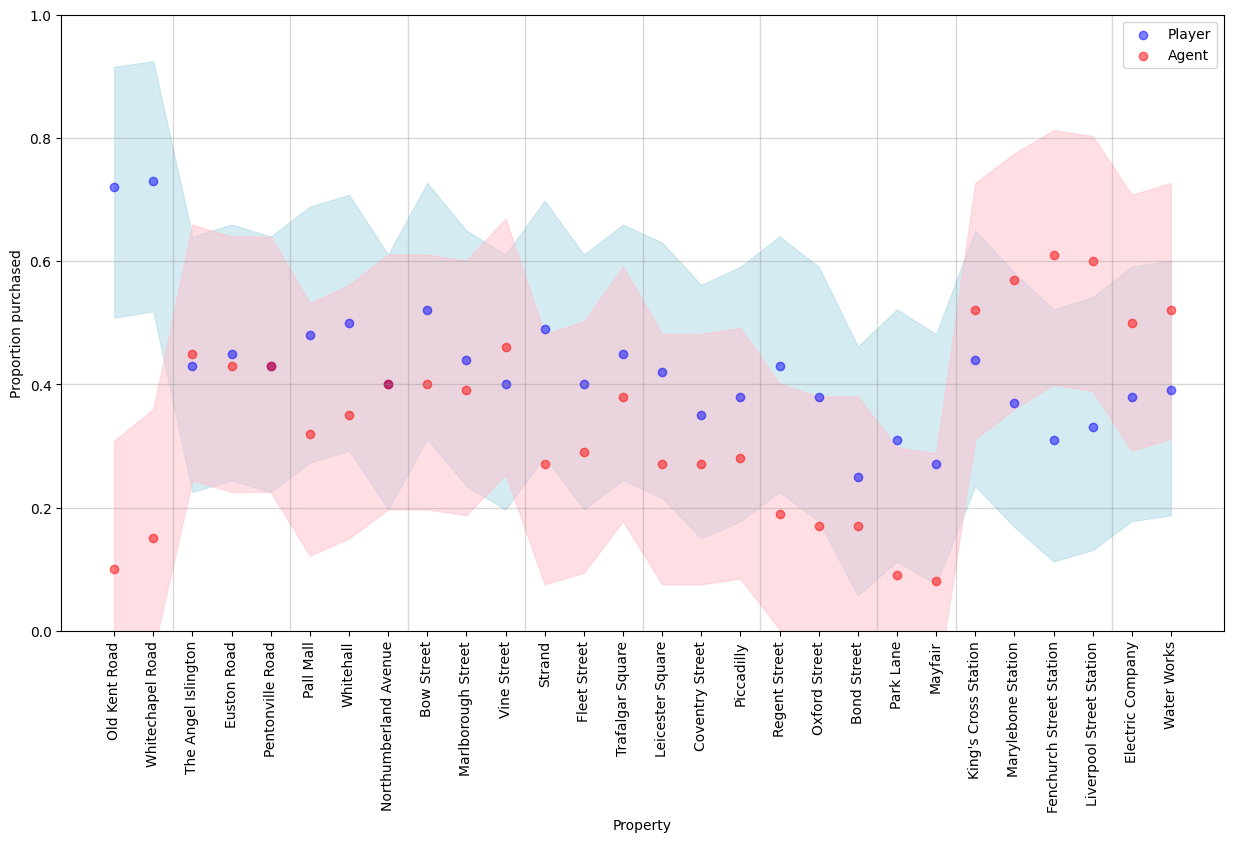

In [260]:
interval_property_plot(props_bought_player, props_bought_agent, 'Proportion purchased')

In [261]:
def interval_whiskers_property_plot(agent, player):
    ci_lower_props_bought_player = [0]*28
    ci_lower_props_bought_agent = [0]*28
    ci_upper_props_bought_player = [0]*28
    ci_upper_props_bought_agent = [0]*28

    z = norm.ppf(0.975)
    n = 100

    for idx, p in enumerate(player):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_player[idx] = p - ci_lower
        ci_upper_props_bought_player[idx] = ci_upper - p

    for idx, p in enumerate(agent):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_agent[idx] = p - ci_lower
        ci_upper_props_bought_agent[idx] = ci_upper - p

    x = range(28)
    plt.figure(figsize=(15, 8))

    vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 21.5, 25.5]
    for i in range(9):
        plt.axvline(vertical_lines[i], alpha = 0.5, color = 'gray', linewidth = 1)

    horizontal_lines = [0.2, 0.4, 0.6, 0.8]
    for i in range(len(horizontal_lines)):
        plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    plt.errorbar(x, props_bought_player, yerr=[ci_lower_props_bought_player, ci_upper_props_bought_player], alpha = 0.5, fmt='o', color='blue', capsize=5, label='Player')
    plt.errorbar(x, props_bought_agent, yerr=[ci_lower_props_bought_agent, ci_upper_props_bought_agent], alpha = 0.5, fmt='o', color='red', capsize=5, label='Agent')
        
    plt.xticks(x, property_names, rotation = 90)
    plt.ylim(0, 1)
    plt.xlabel('Property')
    plt.ylabel('Proportion Purchased')
    plt.gca().xaxis.grid(False)
    plt.legend()
    plt.show()

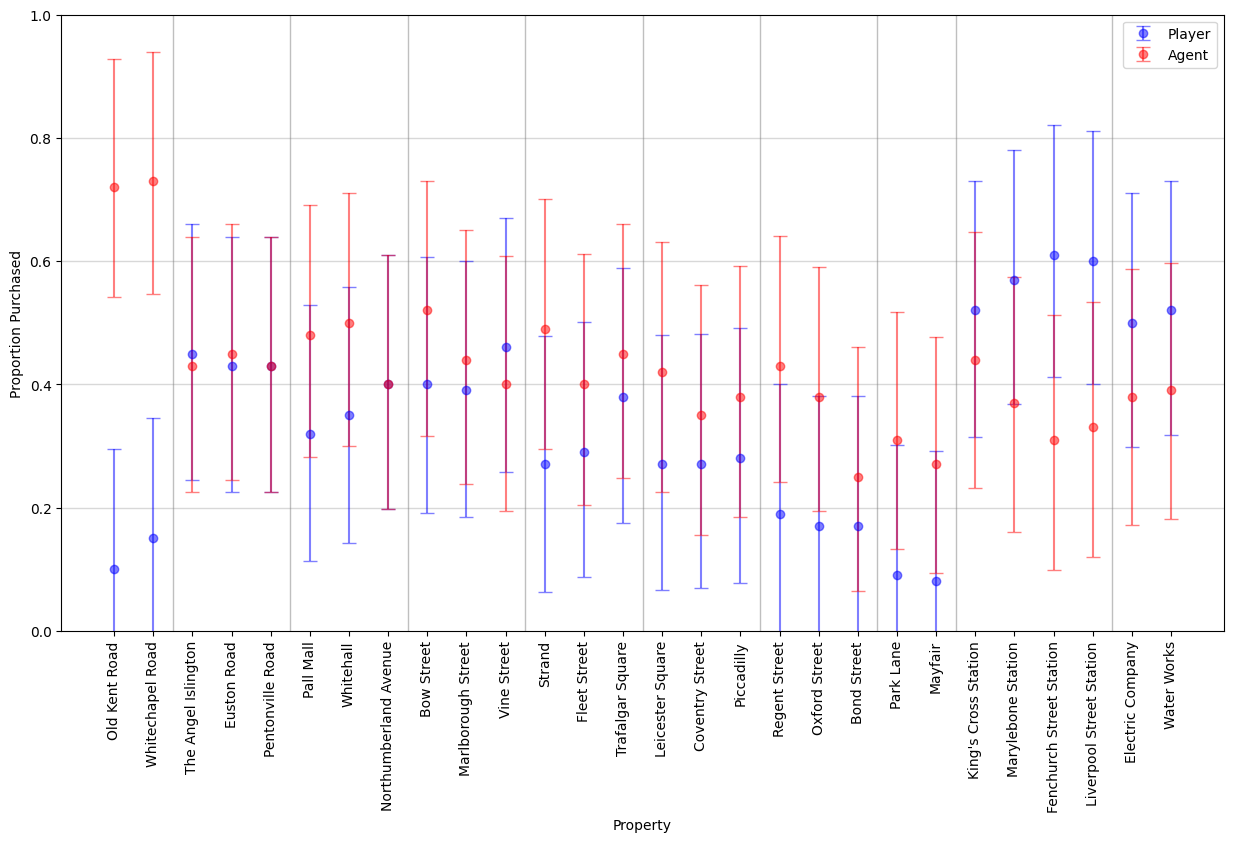

In [262]:
interval_whiskers_property_plot(props_bought_player, props_bought_agent)

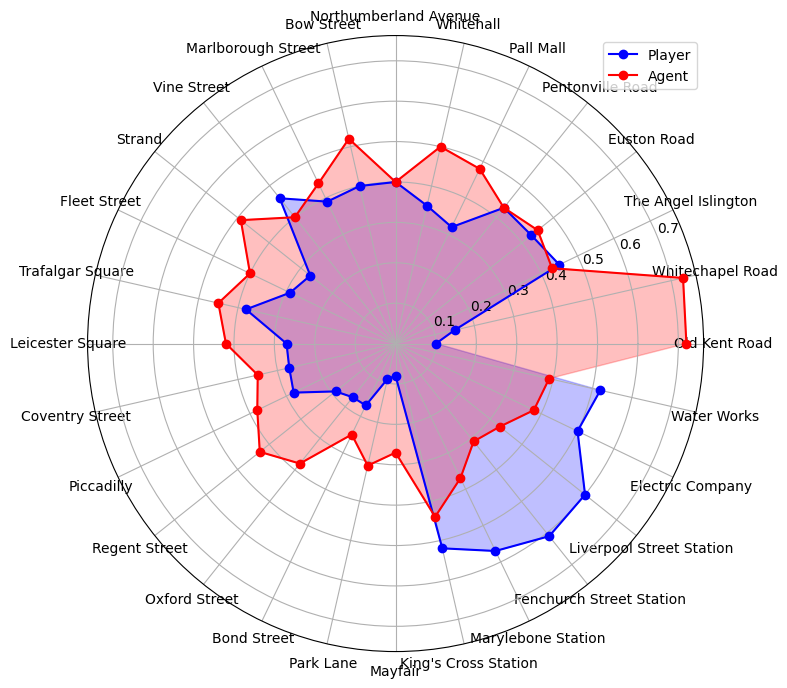

In [263]:
theta = np.linspace(0, 2 * np.pi, len(props_bought_player), endpoint=False)

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

plt.plot(theta, props_bought_player, 'o-', color='blue', label='Player')
plt.plot(theta, props_bought_agent, 'o-', color='red', label='Agent')
plt.fill(theta, props_bought_player, color='blue', alpha=0.25)
plt.fill(theta, props_bought_agent, color='red', alpha=0.25)
plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
plt.legend()
plt.show()

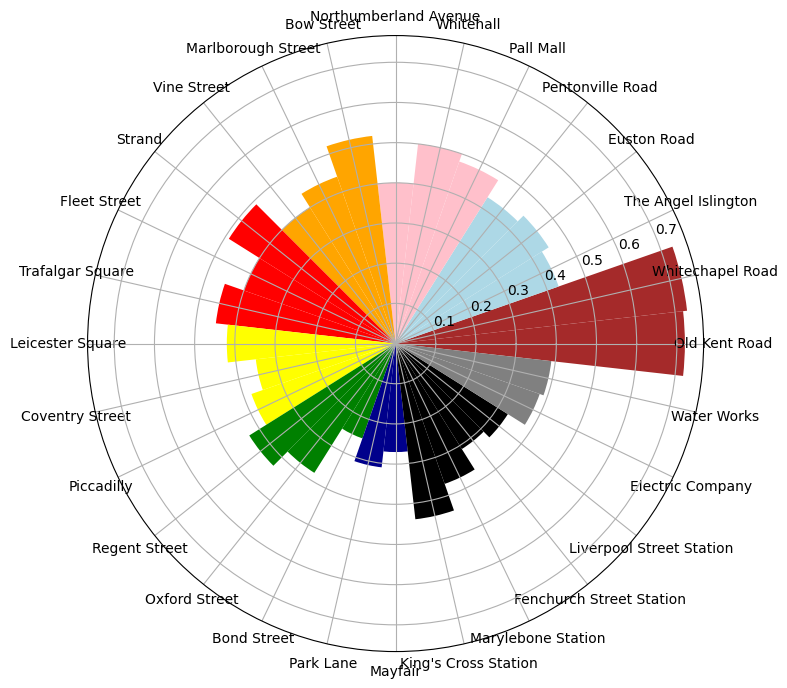

In [264]:
bar_colours = ['brown', 'brown', 'lightblue', 'lightblue', 'lightblue', 'pink', 'pink', 'pink',
               'orange', 'orange', 'orange', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 
               'green', 'green', 'green', 'darkblue', 'darkblue', 'black', 'black', 'black',
               'black', 'grey', 'grey']

theta = np.linspace(0, 2 * np.pi, len(props_bought_agent), endpoint=False)

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

width = 2 * np.pi / len(props_bought_agent)

for i in range(len(props_bought_agent)):
    plt.bar(theta[i], props_bought_agent[i], width=width, color=bar_colours[i])

plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
plt.show()

In [265]:
num_props_bought_agent = [0] * 100
num_props_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Properties']):
    for prop in game:
        if prop[0] == 'Agent':
            num_props_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_props_bought_player[idx] += 1
        else:
            pass

In [266]:
np.mean(num_props_bought_agent)

9.63

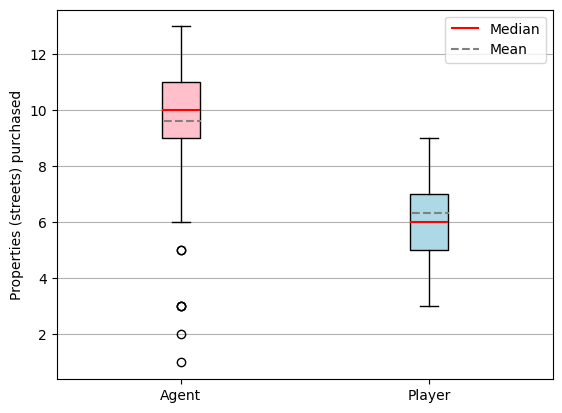

In [267]:
fig, ax = plt.subplots()
box = ax.boxplot([num_props_bought_agent, num_props_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=1.5, label='Median')
box['medians'][1].set(color='red', linewidth=1.5)

ax.set_xticks([1, 2])
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_props_bought_agent), np.mean(num_props_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_props_bought_player), np.mean(num_props_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Properties (streets) purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [268]:
num_stations_bought_agent = [0] * 100
num_stations_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Stations']):
    for prop in game:
        if prop[0] == 'Agent':
            num_stations_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_stations_bought_player[idx] += 1
        else:
            pass

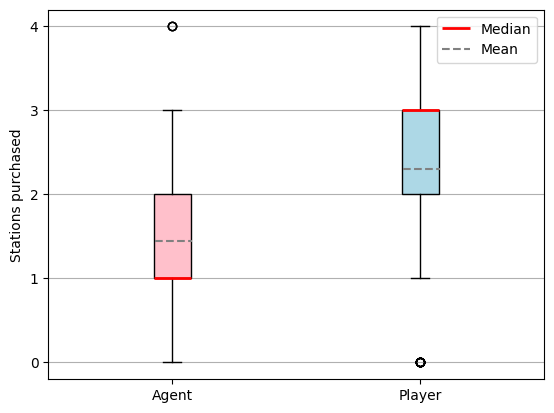

In [269]:
fig, ax = plt.subplots()
box = ax.boxplot([num_stations_bought_agent, num_stations_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_stations_bought_agent), np.mean(num_stations_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_stations_bought_player), np.mean(num_stations_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Stations purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [270]:
num_utilities_bought_agent = [0] * 100
num_utilities_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Utilities']):
    for prop in game:
        if prop[0] == 'Agent':
            num_utilities_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_utilities_bought_player[idx] += 1
        else:
            pass

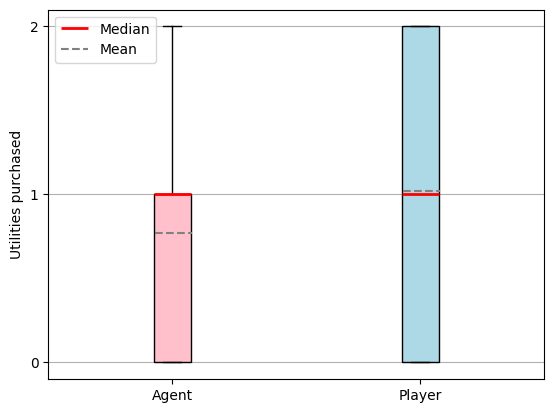

In [271]:
fig, ax = plt.subplots()
box = ax.boxplot([num_utilities_bought_agent, num_utilities_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_utilities_bought_agent), np.mean(num_utilities_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_utilities_bought_player), np.mean(num_utilities_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Utilities purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [272]:
houses_bought_player_1 = [0]*22
houses_bought_agent_1 = [0]*22
houses_bought_player_2 = [0]*22
houses_bought_agent_2 = [0]*22
houses_bought_player_3 = [0]*22
houses_bought_agent_3 = [0]*22
houses_bought_player_4 = [0]*22
houses_bought_agent_4 = [0]*22
hotels_bought_player = [0]*22
hotels_bought_agent = [0]*22
built_player = [0]*22
built_agent = [0]*22

for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            if prop[1] > 0 or prop[2]:
                built_player[idx] += 0.01

            if prop[1] == 1:
                houses_bought_player_1[idx] += 0.01
            elif prop[1] == 2:
                houses_bought_player_2[idx] += 0.01
            elif prop[1] == 3:
                houses_bought_player_3[idx] += 0.01
            elif prop[1] == 4:
                houses_bought_player_4[idx] += 0.01
            elif prop[2]:
                hotels_bought_player[idx] += 0.01
            else:
                pass
        elif prop[0] == 'Agent':
            if prop[1] > 0 or prop[2]:
                built_agent[idx] += 0.01

            if prop[1] == 1:
                houses_bought_agent_1[idx] += 0.01
            elif prop[1] == 2:
                houses_bought_agent_2[idx] += 0.01
            elif prop[1] == 3:
                houses_bought_agent_3[idx] += 0.01
            elif prop[1] == 4:
                houses_bought_agent_4[idx] += 0.01
            elif prop[2]:
                hotels_bought_agent[idx] += 0.01
            else:
                pass
        else:
            pass

In [273]:
houses_bought_player_1_normalised = [houses_bought_player_1[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_1_normalised = [houses_bought_agent_1[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_2_normalised = [houses_bought_player_2[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_2_normalised = [houses_bought_agent_2[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_3_normalised = [houses_bought_player_3[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_3_normalised = [houses_bought_agent_3[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_4_normalised = [houses_bought_player_4[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_4_normalised = [houses_bought_agent_4[i]/props_bought_agent[i] for i in range(22)]
hotels_bought_player_normalised = [hotels_bought_player[i]/props_bought_player[i] for i in range(22)]
hotels_bought_agent_normalised = [hotels_bought_agent[i]/props_bought_agent[i] for i in range(22)]
built_player_normalised = [built_player[i]/props_bought_agent[i] for i in range(22)]
built_agent_normalised = [built_agent[i]/props_bought_agent[i] for i in range(22)]

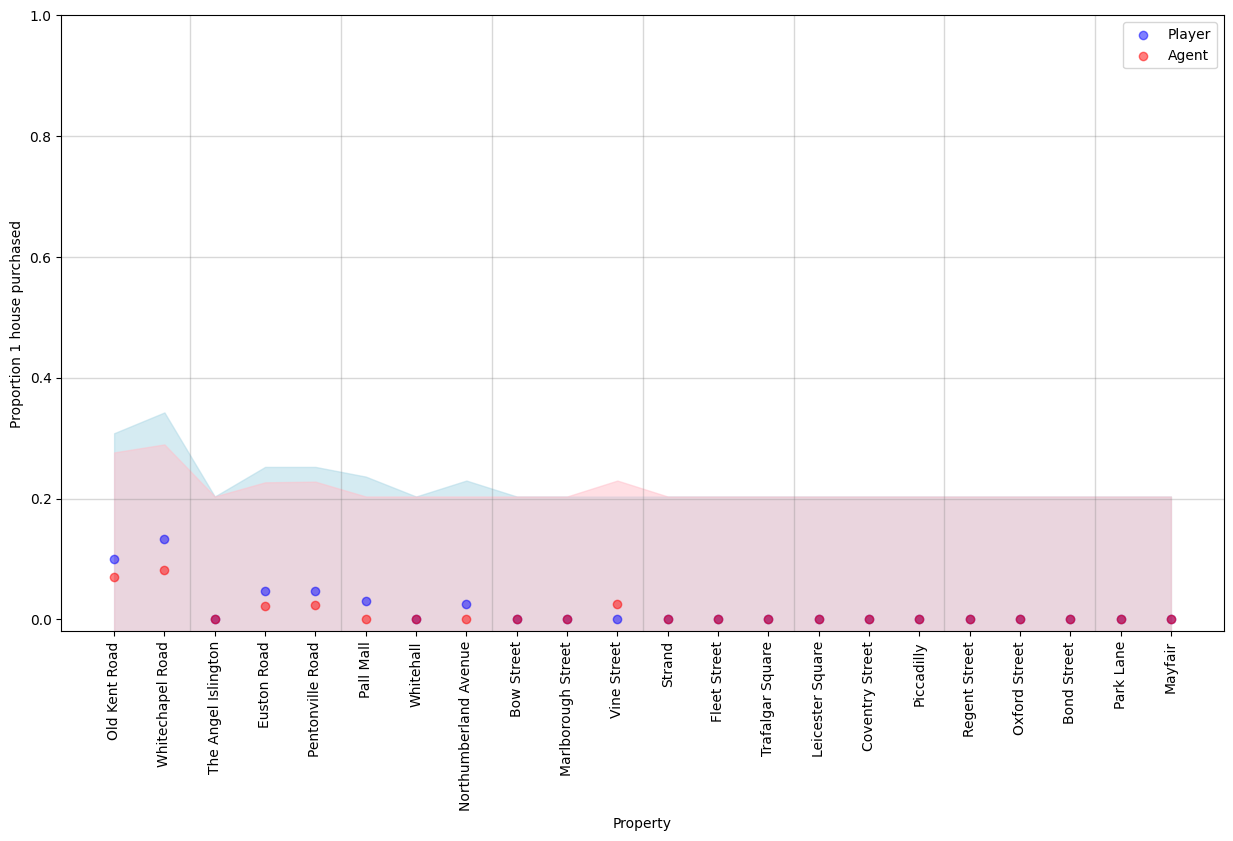

In [274]:
interval_property_plot(houses_bought_agent_1_normalised, houses_bought_player_1_normalised, 'Proportion 1 house purchased', -0.02, 1)

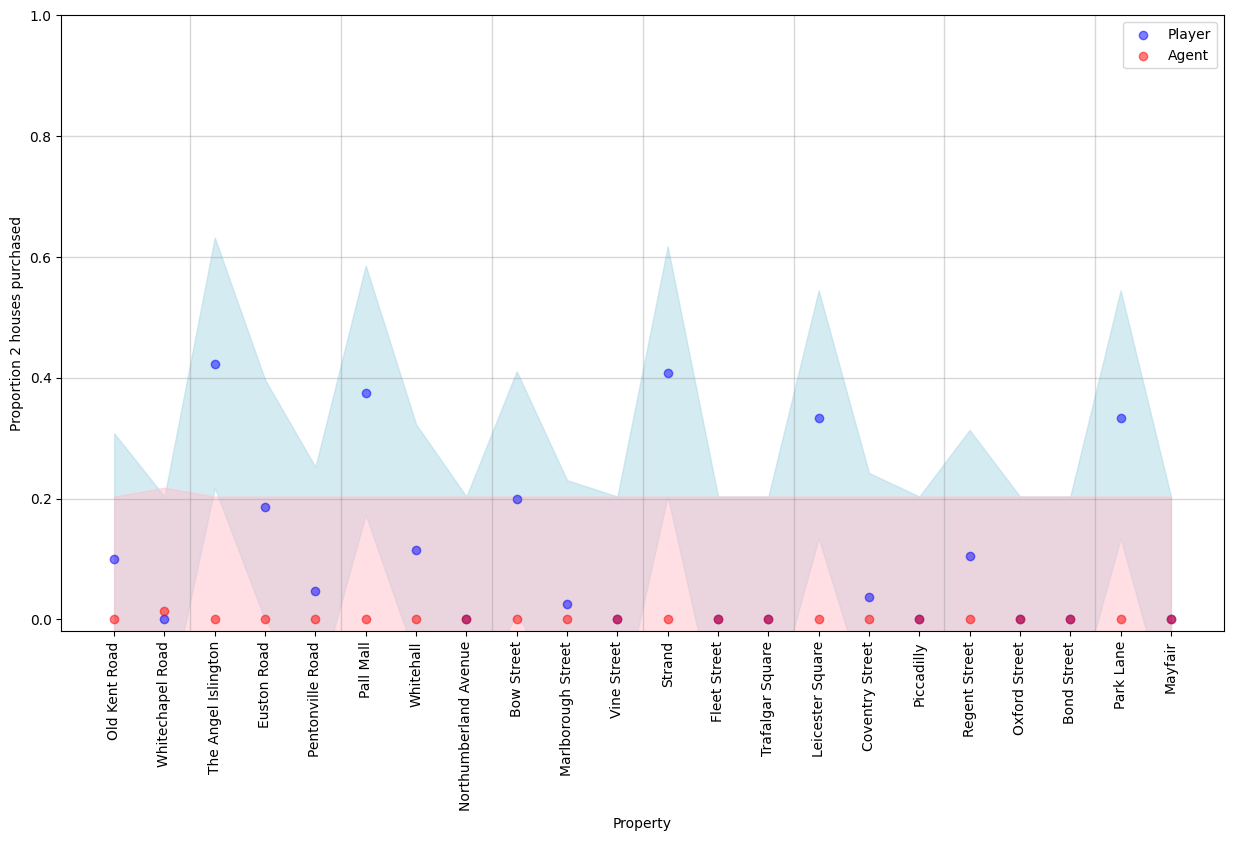

In [275]:
interval_property_plot(houses_bought_agent_2_normalised, houses_bought_player_2_normalised, 'Proportion 2 houses purchased', -0.02, 1)

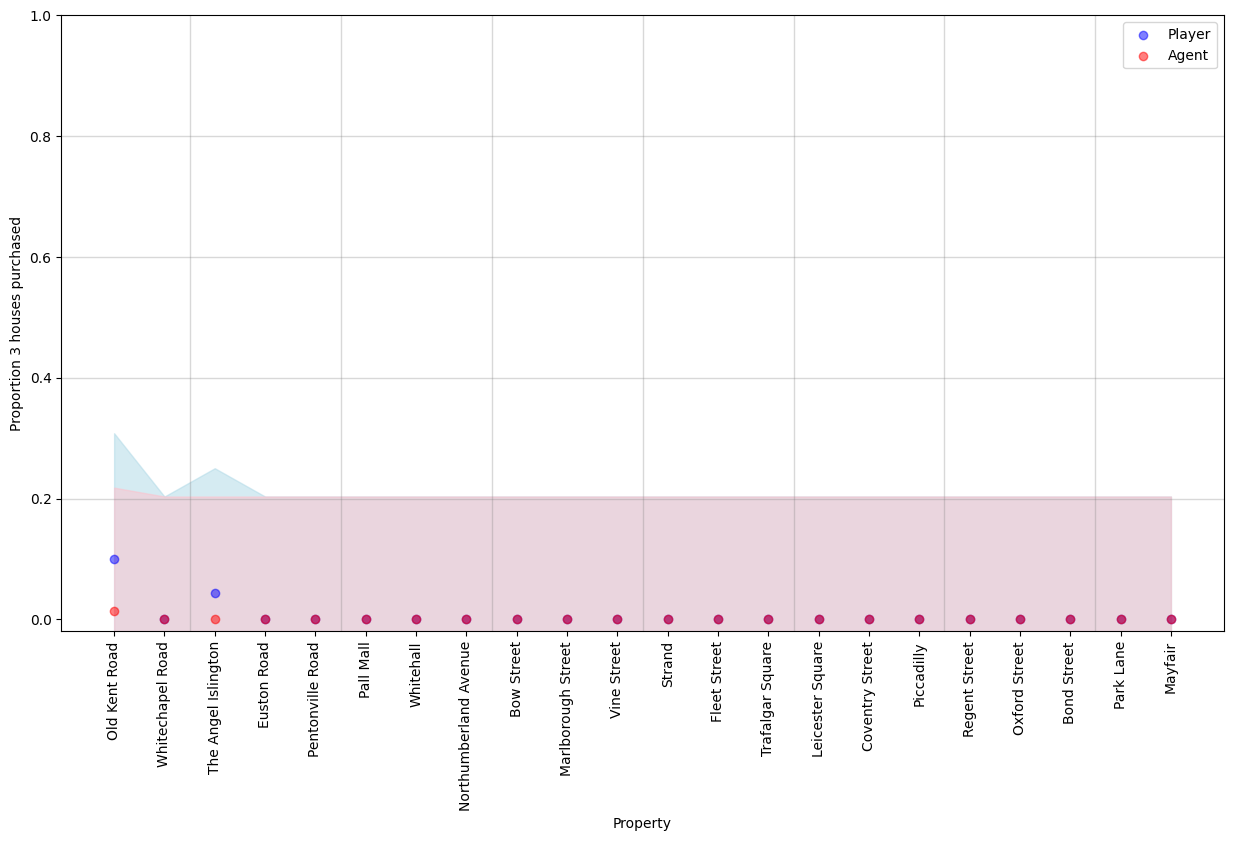

In [276]:
interval_property_plot(houses_bought_agent_3_normalised, houses_bought_player_3_normalised, 'Proportion 3 houses purchased', -0.02, 1)

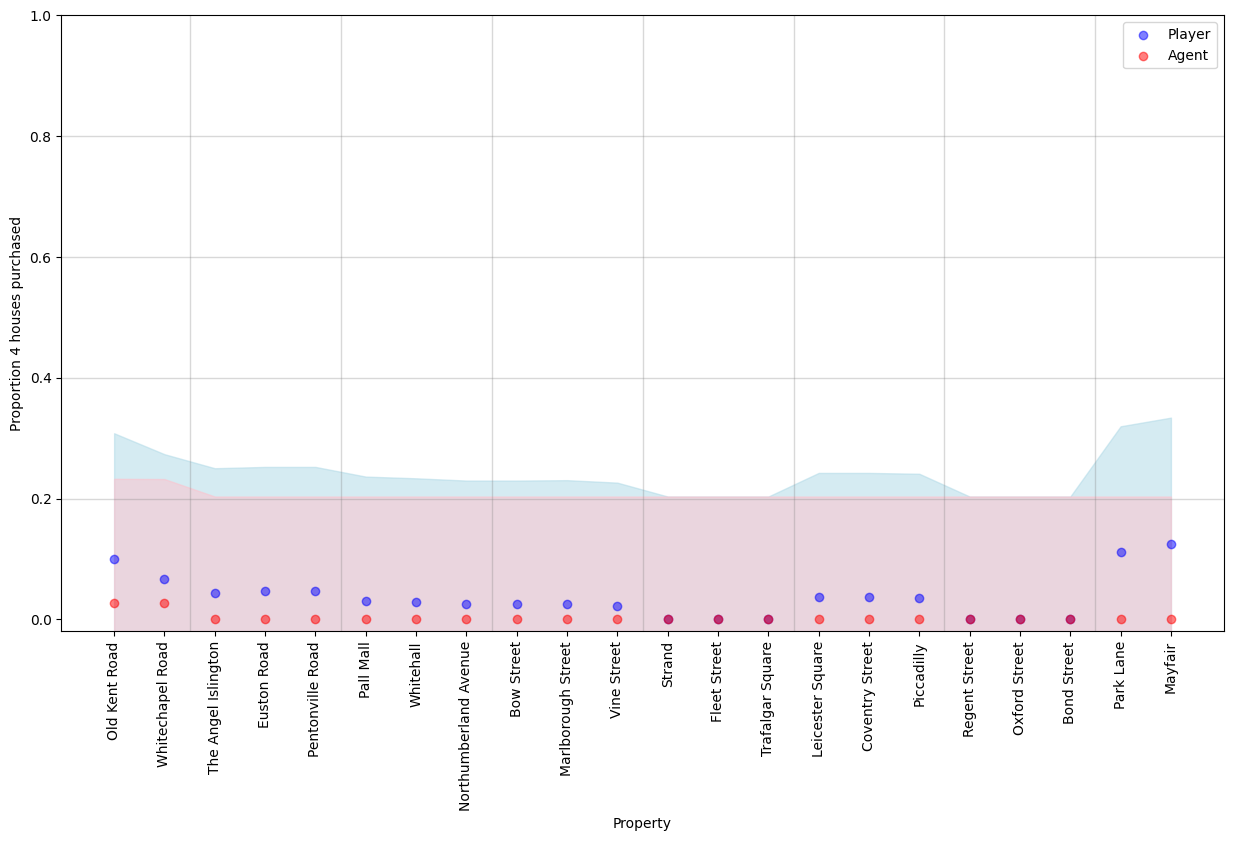

In [277]:
interval_property_plot(houses_bought_agent_4_normalised, houses_bought_player_4_normalised, 'Proportion 4 houses purchased', -0.02, 1)

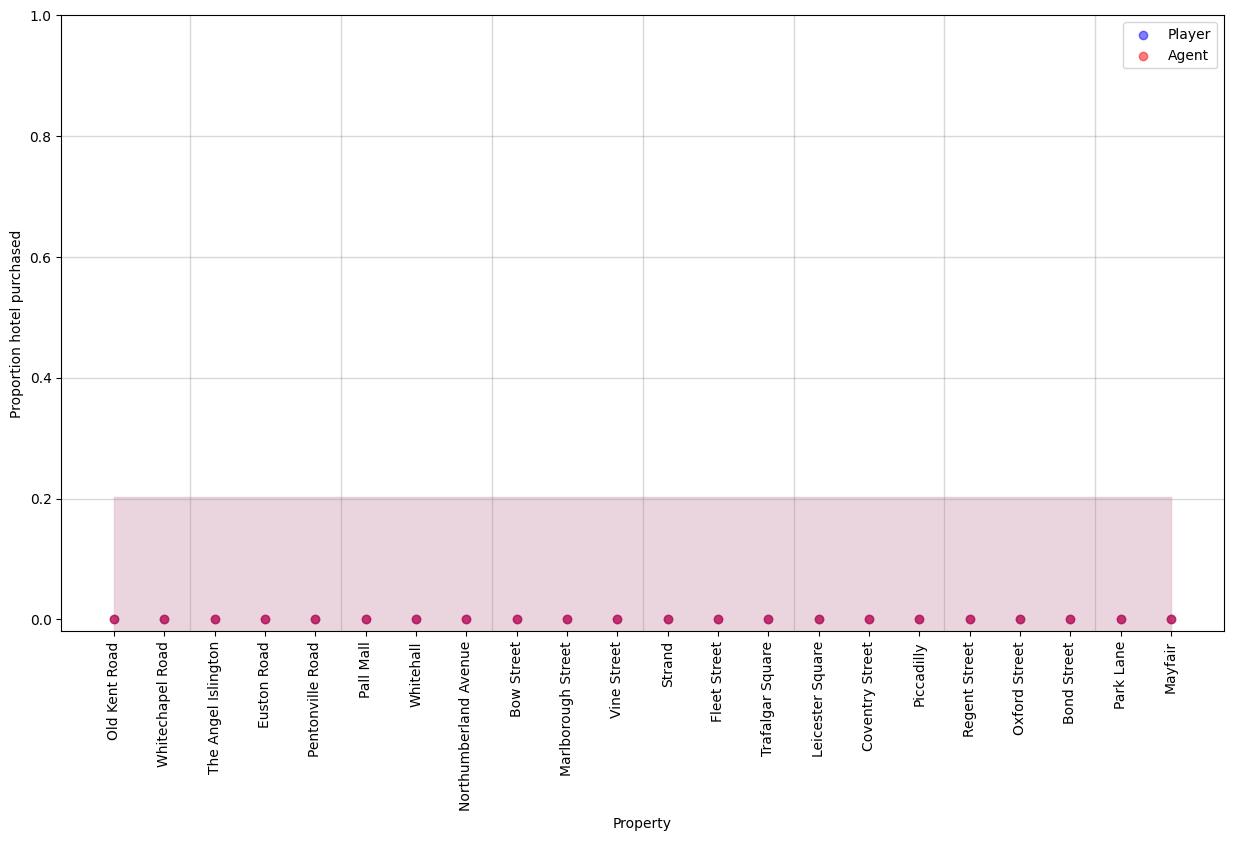

In [278]:
interval_property_plot(hotels_bought_agent_normalised, hotels_bought_player_normalised, 'Proportion hotel purchased', -0.02, 1)

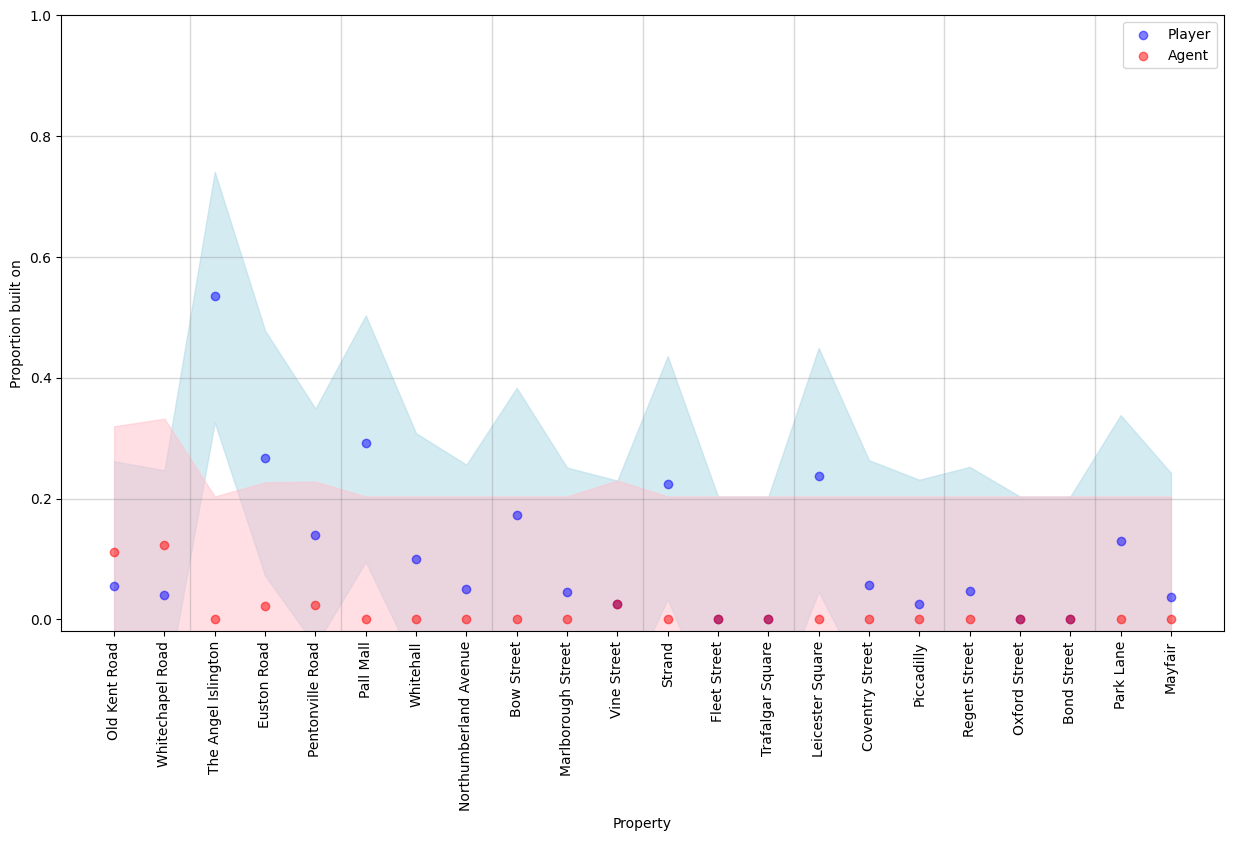

In [279]:
interval_property_plot(built_agent_normalised, built_player_normalised, 'Proportion built on', -0.02, 1)

In [280]:
mortgaged_player = [0]*28
mortgaged_agent = [0]*28

for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[3]:
            mortgaged_player[idx] += 0.01
        elif prop[0] == 'Agent' and prop[3]:
            mortgaged_agent[idx] += 0.01
        else:
            pass

for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+22] += 0.01
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+22] += 0.01
        else:
            pass

for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+26] += 0.01
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+26] += 0.01
        else:
            pass

In [281]:
mortgaged_player_normalised = [mortgaged_player[i]/props_bought_agent[i] for i in range(28)]
mortgaged_agent_normalised = [mortgaged_agent[i]/props_bought_agent[i] for i in range(28)]

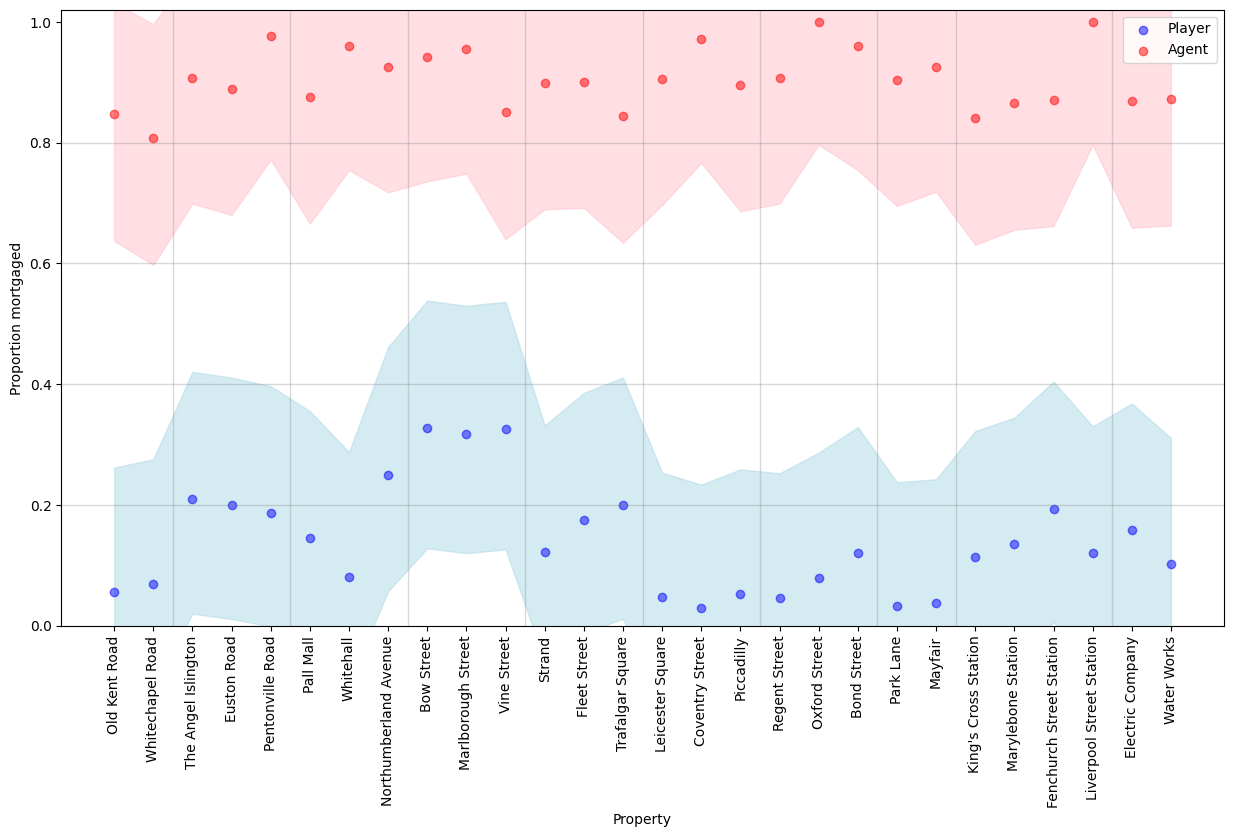

In [282]:
interval_property_plot(mortgaged_agent_normalised, mortgaged_player_normalised, 'Proportion mortgaged', 0, 1.02)

# Game Rollouts -  Base Strategy

## Rollouts

In [2]:
def game():
    node_actions = []

    # create board and add players
    board = MonopolyBoardMCTS()
    agent = Player('Agent')
    player = Player('Player')
    board.add_agent(agent)
    board.add_other_player(player)
    
    # run MCTS game
    root_state = State()
    root_state.from_monopoly_board(board)
    mcts = MCTS(root_state, max_iterations=100, exploration_weight=2**0.5, max_simulations=50)
    
    actions = 0
    max_actions = 5000
    pbar = tqdm(total=max_actions, desc="Running MCTS game")

    # play game until a maximum number of actions or game has ended
    while actions < max_actions and not mcts.root.is_terminal():
        mcts.run()
        legal_actions = [child.action for child in mcts.root.parent.children]
        node_actions.append((mcts.root.action, legal_actions, mcts.root.state.rounds))
        actions += 1
        pbar.update(1)

    pbar.close()

    return mcts.root.state.rounds, mcts.root.state.agent, mcts.root.state.other_players[0], \
        mcts.root.state.properties, mcts.root.state.stations, mcts.root.state.utilities, node_actions

In [3]:
random.seed(42)
num_games = 100
node_actions_100 = []
game_outcomes = {'Rounds': [], 'Agent': [], 'Other player(s)': [], 'Properties': [], 'Stations': [], 'Utilities': []}

for _ in range(num_games):
    rounds, agent, other_players, properties, stations, utilities, node_actions = game()
    game_outcomes['Rounds'].append(rounds)
    game_outcomes['Agent'].append(agent)
    game_outcomes['Other player(s)'].append(other_players)
    game_outcomes['Properties'].append(properties)
    game_outcomes['Stations'].append(stations)
    game_outcomes['Utilities'].append(utilities)
    node_actions_100.append(node_actions)

Running MCTS game: 100%|██████████| 5000/5000 [27:56<00:00,  2.98it/s]  


In [4]:
file_path = 'MCTS_BaseStrategy_100_game_outcomes.json'
with open(file_path, 'w') as json_file:
    json.dump(game_outcomes, json_file, indent=4)

In [99]:
node_actions_100_1 = node_actions_100[:50]
node_actions_100_2 = node_actions_100[50:]

In [100]:
file_path = 'MCTS_BaseStrategy_100_node_actions_1.json'
with open(file_path, 'w') as json_file:
    json.dump(node_actions_100_1, json_file, indent=4)

file_path = 'MCTS_BaseStrategy_100_node_actions_2.json'
with open(file_path, 'w') as json_file:
    json.dump(node_actions_100_2, json_file, indent=4)

## Analysing Game Outcomes

In [23]:
file_path = 'MCTS_BaseStrategy_100_game_outcomes.json'
with open(file_path, 'r') as json_file:
    game_outcomes = json.load(json_file)

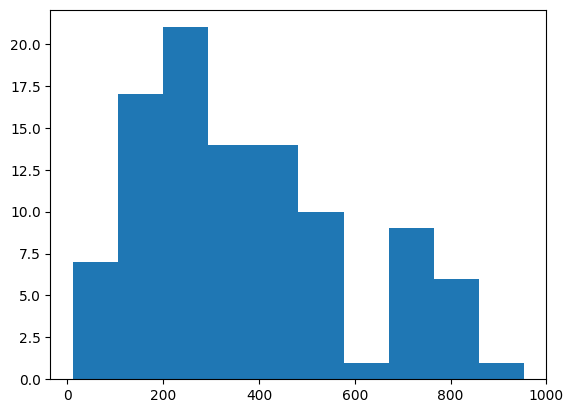

In [24]:
plt.hist(game_outcomes['Rounds'])
plt.show()

In [25]:
agent_losses = sum([agent[3] for agent in game_outcomes['Agent']])
agent_wins = sum([agent[3] for agent in game_outcomes['Other player(s)']])
game_not_ended = 100 - agent_losses - agent_wins

print(f'Out of 100 games with 2 players, run for 1000 decisions, using a base strategy, the agent won \n {agent_wins} games, the other player won {agent_losses} games. The other {game_not_ended} games did not end in this time period.')

Out of 100 games with 2 players, run for 1000 decisions, using a base strategy, the agent won 
 9 games, the other player won 2 games. The other 89 games did not end in this time period.


In [26]:
street_data = [
            ("Old Kent Road", 60, 50, 2, 10, 30, 90, 160, 250, 1, "brown", 2),
            ("Whitechapel Road", 60, 50, 4, 20, 60, 180, 320, 450, 3, "brown", 2),
            ("The Angel Islington", 100, 50, 6, 30, 90, 270, 400, 550, 6, "lightblue", 3),
            ("Euston Road", 100, 50, 6, 30, 90, 270, 400, 550, 8, "lightblue", 3),
            ("Pentonville Road", 120, 50, 8, 40, 100, 300, 450, 600, 9, "lightblue", 3),
            ("Pall Mall", 140, 100, 10, 50, 150, 450, 625, 750, 11, "pink", 3),
            ("Whitehall", 140, 100, 10, 50, 150, 450, 625, 750, 13, "pink", 3),
            ("Northumberland Avenue", 160, 100, 12, 60, 180, 500, 700, 900, 14, "pink", 3),
            ("Bow Street", 180, 100, 14, 70, 200, 550, 750, 950, 16, "orange", 3),
            ("Marlborough Street", 180, 100, 14, 70, 200, 550, 750, 950, 18, "orange", 3),
            ("Vine Street", 200, 100, 16, 80, 220, 600, 800, 1000, 19, "orange", 3),
            ("The Strand", 220, 150, 18, 90, 250, 700, 875, 1050, 21, "red", 3),
            ("Fleet Street", 220, 150, 18, 90, 250, 700, 875, 1050, 23, "red", 3),
            ("Trafalgar Square", 240, 150, 20, 100, 300, 750, 925, 1100, 24, "red", 3),
            ("Leicester Square", 260, 150, 22, 110, 330, 800, 975, 1150, 26, "yellow", 3),
            ("Coventry Street", 260, 150, 22, 110, 330, 800, 975, 1150, 27, "yellow", 3),
            ("Piccadilly", 280, 150, 24, 120, 360, 850, 1025, 1200, 29, "yellow", 3),
            ("Regent Street", 300, 200, 26, 130, 390, 900, 1100, 1275, 31, "green", 3),
            ("Oxford Street", 300, 200, 26, 130, 390, 900, 1100, 1275, 32, "green", 3),
            ("Bond Street", 320, 200, 28, 150, 450, 1000, 1200, 1400, 34, "green", 3),
            ("Park Lane", 350, 200, 35, 175, 500, 1100, 1300, 1500, 37, "darkblue", 2),
            ("Mayfair", 400, 200, 50, 200, 600, 1400, 1700, 2000, 39, "darkblue", 2)
        ]

In [27]:
# wealth: money, properties (mortgaged/unmortgaged + buildings)
agent_wealth = []
player_wealth = []

for idx in range(100):
    money_agent = game_outcomes['Agent'][idx][2]
    money_player = game_outcomes['Other player(s)'][idx][2]

    for idx, prop in enumerate(game_outcomes['Properties'][idx]):
        if prop[0] == 'Agent':
            if prop[3]:
                money_agent += street_data[idx][1]/2
            else:
                money_agent += street_data[idx][1]

            money_agent += street_data[idx][2] * (prop[1]+prop[2])

        elif prop[0] == 'Player':
            if prop[3]:
                money_player += street_data[idx][1]/2
            else:
                money_player += street_data[idx][1]

            money_player += street_data[idx][2] * (prop[1]+prop[2])

    agent_wealth.append(money_agent)
    player_wealth.append(money_player)

In [28]:
sum([agent_wealth[i] > player_wealth[i] for i in range(100)])

12

In [286]:
property_names = [
    "Old Kent Road",
    "Whitechapel Road",
    "The Angel Islington",
    "Euston Road",
    "Pentonville Road",
    "Pall Mall",
    "Whitehall",
    "Northumberland Avenue",
    "Bow Street",
    "Marlborough Street",
    "Vine Street",
    "Strand",
    "Fleet Street",
    "Trafalgar Square",
    "Leicester Square",
    "Coventry Street",
    "Piccadilly",
    "Regent Street",
    "Oxford Street",
    "Bond Street",
    "Park Lane",
    "Mayfair",
    "King's Cross Station",
    "Marylebone Station",
    "Fenchurch Street Station",
    "Liverpool Street Station",
    "Electric Company",
    "Water Works"
]

In [287]:
props_bought_player = [0]*28
props_bought_agent = [0]*28

for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx] += 0.01
        else:
            pass

for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+22] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx+22] += 0.01
        else:
            pass

for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            props_bought_player[idx+26] += 0.01
        elif prop[0] == 'Agent':
            props_bought_agent[idx+26] += 0.01
        else:
            pass

In [288]:
def wilson_score_interval(p, n, z):
    z_squared = z**2
    phat = p + z_squared / (2 * n)
    margin_of_error = z * np.sqrt((p * (1 - p) / n) + z_squared / (4 * n))
    
    ci_lower = (phat - margin_of_error) / (1 + z_squared / n)
    ci_upper = (phat + margin_of_error) / (1 + z_squared / n)
    
    return ci_lower, ci_upper


In [289]:
def interval_property_plot(agent, player, ylabel, ylim0=0, ylim1=1):
    num_points = len(agent)
    ci_lower_props_bought_player = [0]*num_points
    ci_lower_props_bought_agent = [0]*num_points
    ci_upper_props_bought_player = [0]*num_points
    ci_upper_props_bought_agent = [0]*num_points

    z = norm.ppf(0.975)
    n = 100

    for idx, p in enumerate(player):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_player[idx] = ci_lower
        ci_upper_props_bought_player[idx] = ci_upper

    for idx, p in enumerate(agent):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_agent[idx] = ci_lower
        ci_upper_props_bought_agent[idx] = ci_upper

    x = range(num_points)
    plt.figure(figsize=(15, 8))

    vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5]
    for i in range(len(vertical_lines)):
        plt.axvline(vertical_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    if num_points > 22:
        vertical_lines = [21.5, 25.5]
        for i in range(len(vertical_lines)):
            plt.axvline(vertical_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    horizontal_lines = [0.2, 0.4, 0.6, 0.8]
    for i in range(len(horizontal_lines)):
        plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    plt.fill_between(x, ci_lower_props_bought_player, ci_upper_props_bought_player, color='lightblue', alpha=0.5)
    plt.fill_between(x, ci_lower_props_bought_agent, ci_upper_props_bought_agent, color='pink', alpha=0.5)
    plt.scatter(x, player, alpha = 0.5, color = 'blue', label = 'Player')
    plt.scatter(x, agent, alpha = 0.5, color = 'red', label = 'Agent')
        
    plt.xticks(x, property_names[:num_points], rotation = 90)
    plt.xlabel('Property')
    plt.ylabel(ylabel)
    
    plt.ylim(ylim0, ylim1)
    plt.legend()
    plt.show()

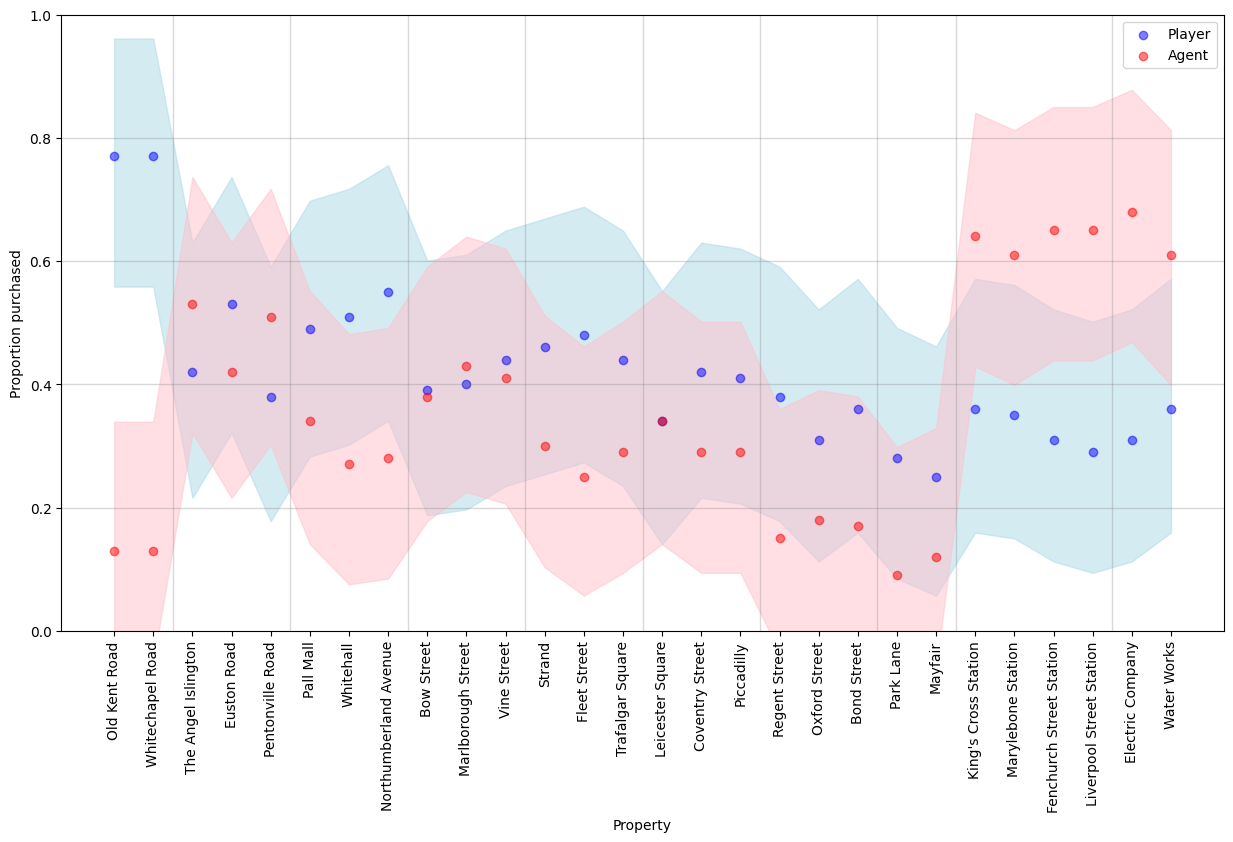

In [313]:
interval_property_plot(props_bought_player, props_bought_agent, 'Proportion purchased')

In [291]:
def interval_whiskers_property_plot(agent, player):
    ci_lower_props_bought_player = [0]*28
    ci_lower_props_bought_agent = [0]*28
    ci_upper_props_bought_player = [0]*28
    ci_upper_props_bought_agent = [0]*28

    z = norm.ppf(0.975)
    n = 100

    for idx, p in enumerate(player):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_player[idx] = p - ci_lower
        ci_upper_props_bought_player[idx] = ci_upper - p

    for idx, p in enumerate(agent):
        ci_lower, ci_upper = wilson_score_interval(p, n, z)
        ci_lower_props_bought_agent[idx] = p - ci_lower
        ci_upper_props_bought_agent[idx] = ci_upper - p

    x = range(28)
    plt.figure(figsize=(15, 8))

    vertical_lines = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 21.5, 25.5]
    for i in range(9):
        plt.axvline(vertical_lines[i], alpha = 0.5, color = 'gray', linewidth = 1)

    horizontal_lines = [0.2, 0.4, 0.6, 0.8]
    for i in range(len(horizontal_lines)):
        plt.axhline(horizontal_lines[i], alpha = 0.3, color = 'gray', linewidth = 1)

    plt.errorbar(x, props_bought_player, yerr=[ci_lower_props_bought_player, ci_upper_props_bought_player], alpha = 0.5, fmt='o', color='blue', capsize=5, label='Player')
    plt.errorbar(x, props_bought_agent, yerr=[ci_lower_props_bought_agent, ci_upper_props_bought_agent], alpha = 0.5, fmt='o', color='red', capsize=5, label='Agent')
        
    plt.xticks(x, property_names, rotation = 90)
    plt.ylim(0, 1)
    plt.xlabel('Property')
    plt.ylabel('Proportion Purchased')
    plt.gca().xaxis.grid(False)
    plt.legend()
    plt.show()

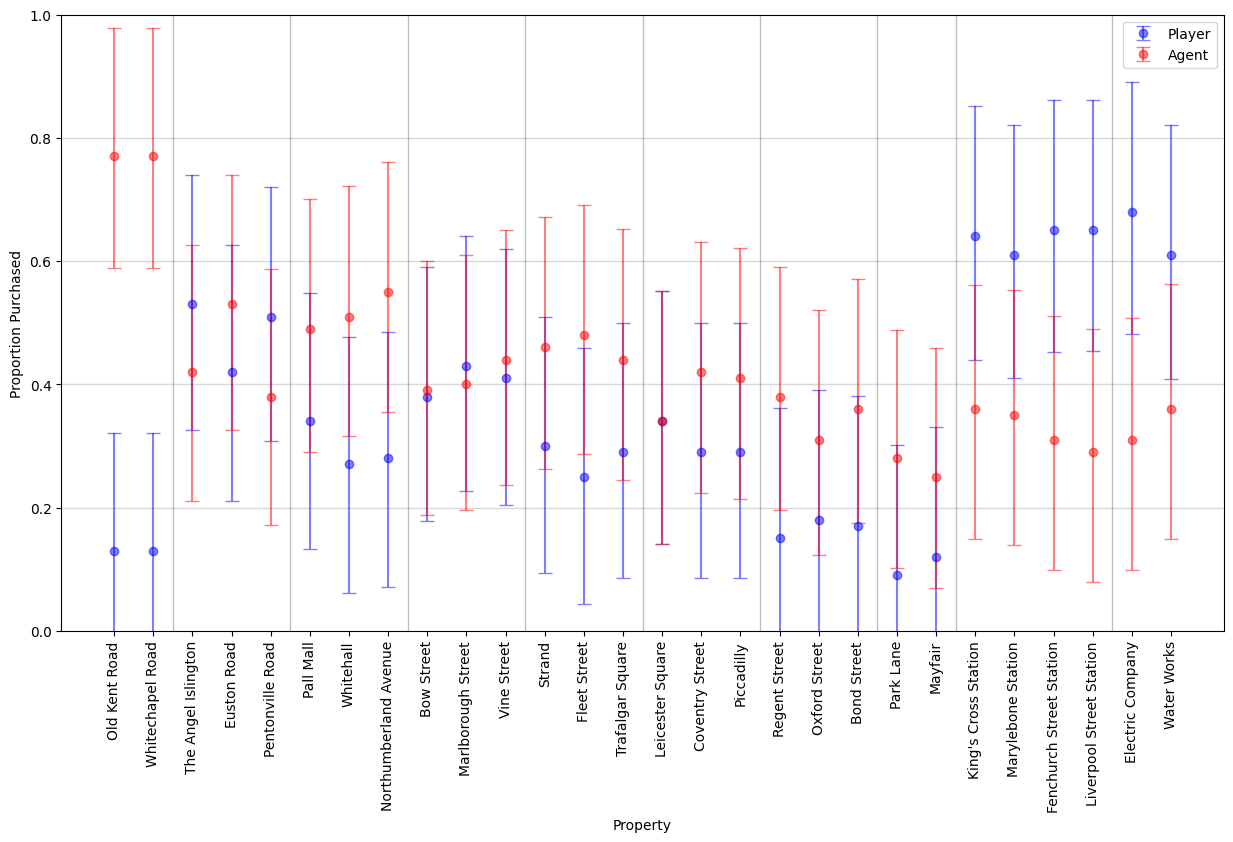

In [292]:
interval_whiskers_property_plot(props_bought_player, props_bought_agent)

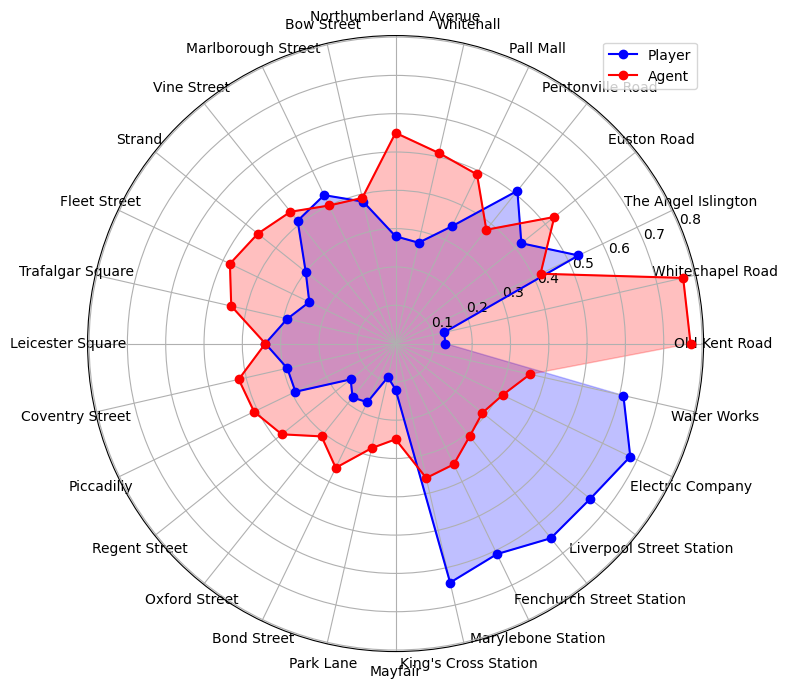

In [293]:
theta = np.linspace(0, 2 * np.pi, len(props_bought_player), endpoint=False)

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

plt.plot(theta, props_bought_player, 'o-', color='blue', label='Player')
plt.plot(theta, props_bought_agent, 'o-', color='red', label='Agent')
plt.fill(theta, props_bought_player, color='blue', alpha=0.25)
plt.fill(theta, props_bought_agent, color='red', alpha=0.25)
plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
plt.legend()
plt.show()

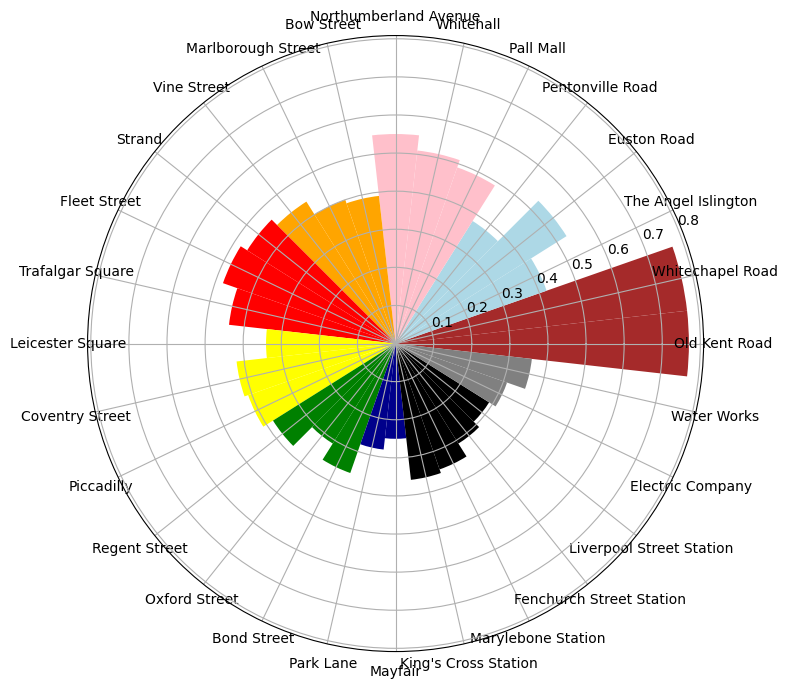

In [294]:
bar_colours = ['brown', 'brown', 'lightblue', 'lightblue', 'lightblue', 'pink', 'pink', 'pink',
               'orange', 'orange', 'orange', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 
               'green', 'green', 'green', 'darkblue', 'darkblue', 'black', 'black', 'black',
               'black', 'grey', 'grey']

theta = np.linspace(0, 2 * np.pi, len(props_bought_agent), endpoint=False)

plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

width = 2 * np.pi / len(props_bought_agent)

for i in range(len(props_bought_agent)):
    plt.bar(theta[i], props_bought_agent[i], width=width, color=bar_colours[i])

plt.thetagrids(np.arange(0, 360, 360 / len(property_names)), labels=property_names)
plt.show()

In [295]:
num_props_bought_agent = [0] * 100
num_props_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Properties']):
    for prop in game:
        if prop[0] == 'Agent':
            num_props_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_props_bought_player[idx] += 1
        else:
            pass

In [296]:
np.mean(num_props_bought_agent)

9.78

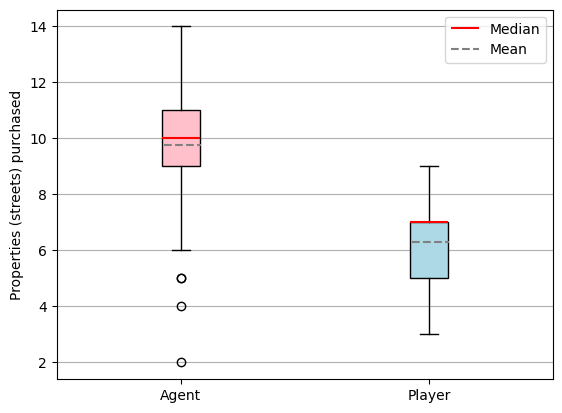

In [297]:
fig, ax = plt.subplots()
box = ax.boxplot([num_props_bought_agent, num_props_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=1.5, label='Median')
box['medians'][1].set(color='red', linewidth=1.5)

ax.set_xticks([1, 2])
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_props_bought_agent), np.mean(num_props_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_props_bought_player), np.mean(num_props_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Properties (streets) purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [298]:
num_stations_bought_agent = [0] * 100
num_stations_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Stations']):
    for prop in game:
        if prop[0] == 'Agent':
            num_stations_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_stations_bought_player[idx] += 1
        else:
            pass

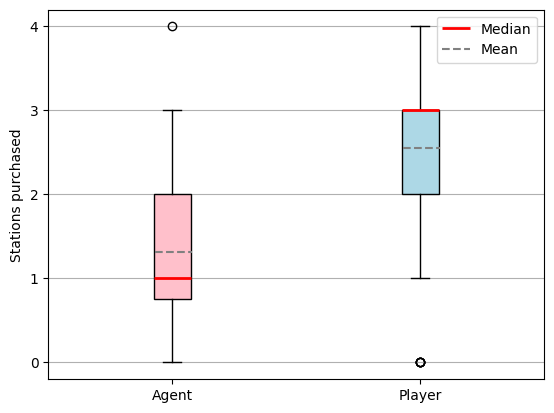

In [299]:
fig, ax = plt.subplots()
box = ax.boxplot([num_stations_bought_agent, num_stations_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_stations_bought_agent), np.mean(num_stations_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_stations_bought_player), np.mean(num_stations_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Stations purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [300]:
num_utilities_bought_agent = [0] * 100
num_utilities_bought_player = [0] * 100

for idx, game in enumerate(game_outcomes['Utilities']):
    for prop in game:
        if prop[0] == 'Agent':
            num_utilities_bought_agent[idx] += 1
        elif prop[0] == 'Player':
            num_utilities_bought_player[idx] += 1
        else:
            pass

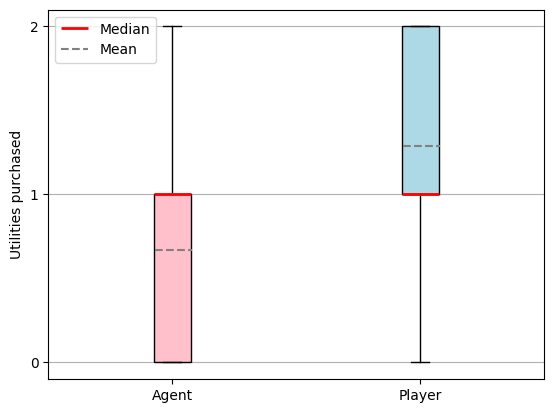

In [301]:
fig, ax = plt.subplots()
box = ax.boxplot([num_utilities_bought_agent, num_utilities_bought_player], patch_artist=True)

colors = ['pink', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

box['medians'][0].set(color='red', linewidth=2, label='Median')
box['medians'][1].set(color='red', linewidth=2)

ax.set_xticks([1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Agent', 'Player']) 
plt.plot([0.93, 1.08], [np.mean(num_utilities_bought_agent), np.mean(num_utilities_bought_agent)], color='grey', linestyle='dashed', label='Mean')
plt.plot([1.93, 2.08], [np.mean(num_utilities_bought_player), np.mean(num_utilities_bought_player)], color='grey', linestyle='dashed')
plt.ylabel('Utilities purchased')
plt.grid(axis='y')
plt.legend()
plt.show()

In [302]:
houses_bought_player_1 = [0]*22
houses_bought_agent_1 = [0]*22
houses_bought_player_2 = [0]*22
houses_bought_agent_2 = [0]*22
houses_bought_player_3 = [0]*22
houses_bought_agent_3 = [0]*22
houses_bought_player_4 = [0]*22
houses_bought_agent_4 = [0]*22
hotels_bought_player = [0]*22
hotels_bought_agent = [0]*22
built_player = [0]*22
built_agent = [0]*22

for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player':
            if prop[1] > 0 or prop[2]:
                built_player[idx] += 0.01

            if prop[1] == 1:
                houses_bought_player_1[idx] += 0.01
            elif prop[1] == 2:
                houses_bought_player_2[idx] += 0.01
            elif prop[1] == 3:
                houses_bought_player_3[idx] += 0.01
            elif prop[1] == 4:
                houses_bought_player_4[idx] += 0.01
            elif prop[2]:
                hotels_bought_player[idx] += 0.01
            else:
                pass
        elif prop[0] == 'Agent':
            if prop[1] > 0 or prop[2]:
                built_agent[idx] += 0.01

            if prop[1] == 1:
                houses_bought_agent_1[idx] += 0.01
            elif prop[1] == 2:
                houses_bought_agent_2[idx] += 0.01
            elif prop[1] == 3:
                houses_bought_agent_3[idx] += 0.01
            elif prop[1] == 4:
                houses_bought_agent_4[idx] += 0.01
            elif prop[2]:
                hotels_bought_agent[idx] += 0.01
            else:
                pass
        else:
            pass

In [303]:
houses_bought_player_1_normalised = [houses_bought_player_1[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_1_normalised = [houses_bought_agent_1[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_2_normalised = [houses_bought_player_2[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_2_normalised = [houses_bought_agent_2[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_3_normalised = [houses_bought_player_3[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_3_normalised = [houses_bought_agent_3[i]/props_bought_agent[i] for i in range(22)]
houses_bought_player_4_normalised = [houses_bought_player_4[i]/props_bought_player[i] for i in range(22)]
houses_bought_agent_4_normalised = [houses_bought_agent_4[i]/props_bought_agent[i] for i in range(22)]
hotels_bought_player_normalised = [hotels_bought_player[i]/props_bought_player[i] for i in range(22)]
hotels_bought_agent_normalised = [hotels_bought_agent[i]/props_bought_agent[i] for i in range(22)]
built_player_normalised = [built_player[i]/props_bought_agent[i] for i in range(22)]
built_agent_normalised = [built_agent[i]/props_bought_agent[i] for i in range(22)]

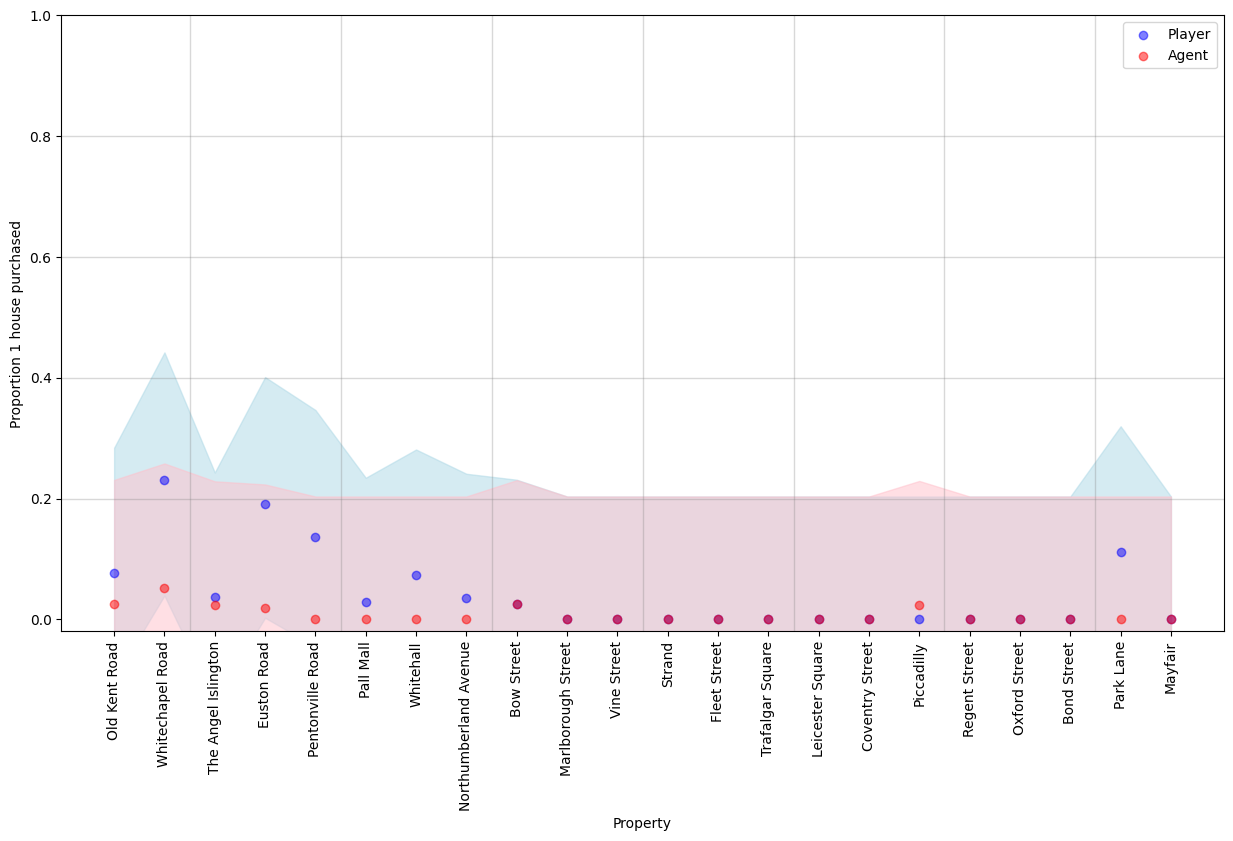

In [304]:
interval_property_plot(houses_bought_agent_1_normalised, houses_bought_player_1_normalised, 'Proportion 1 house purchased', -0.02, 1)

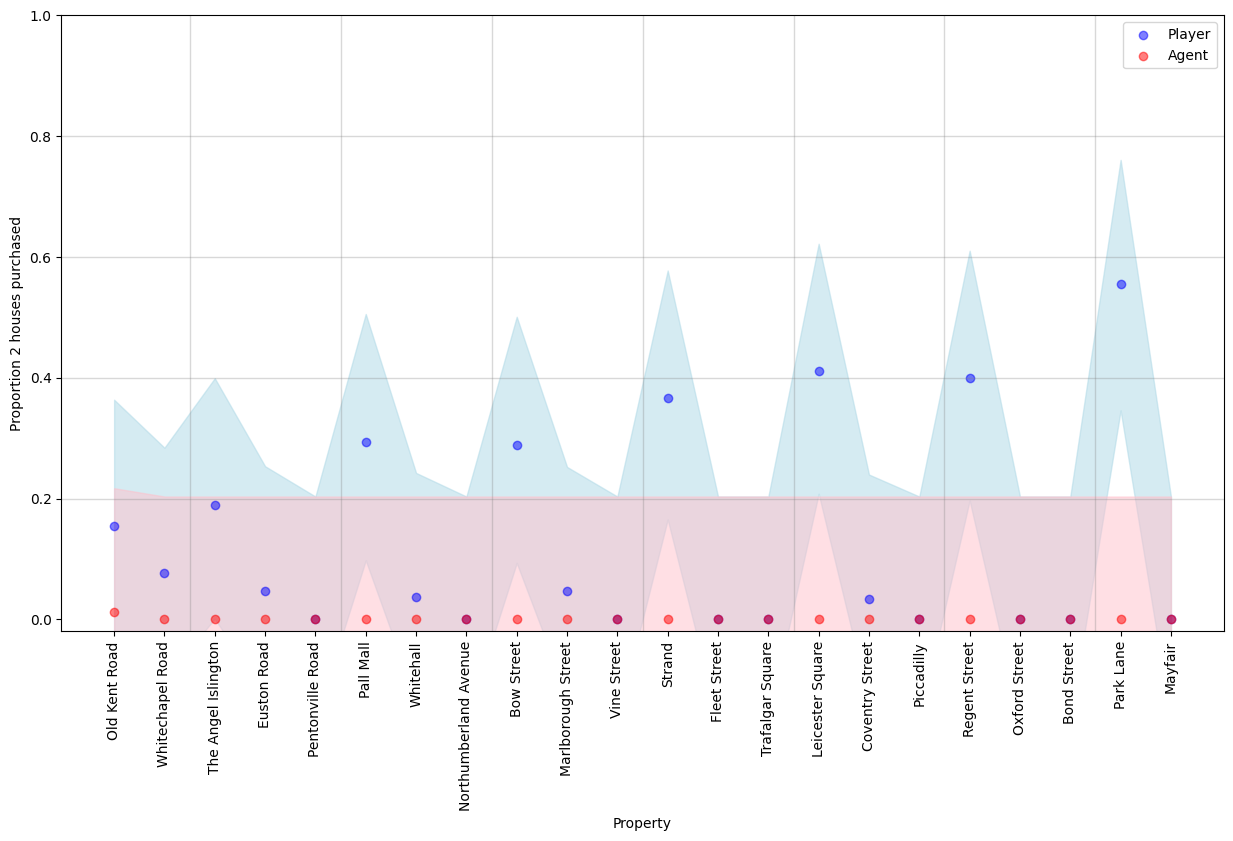

In [305]:
interval_property_plot(houses_bought_agent_2_normalised, houses_bought_player_2_normalised, 'Proportion 2 houses purchased', -0.02, 1)

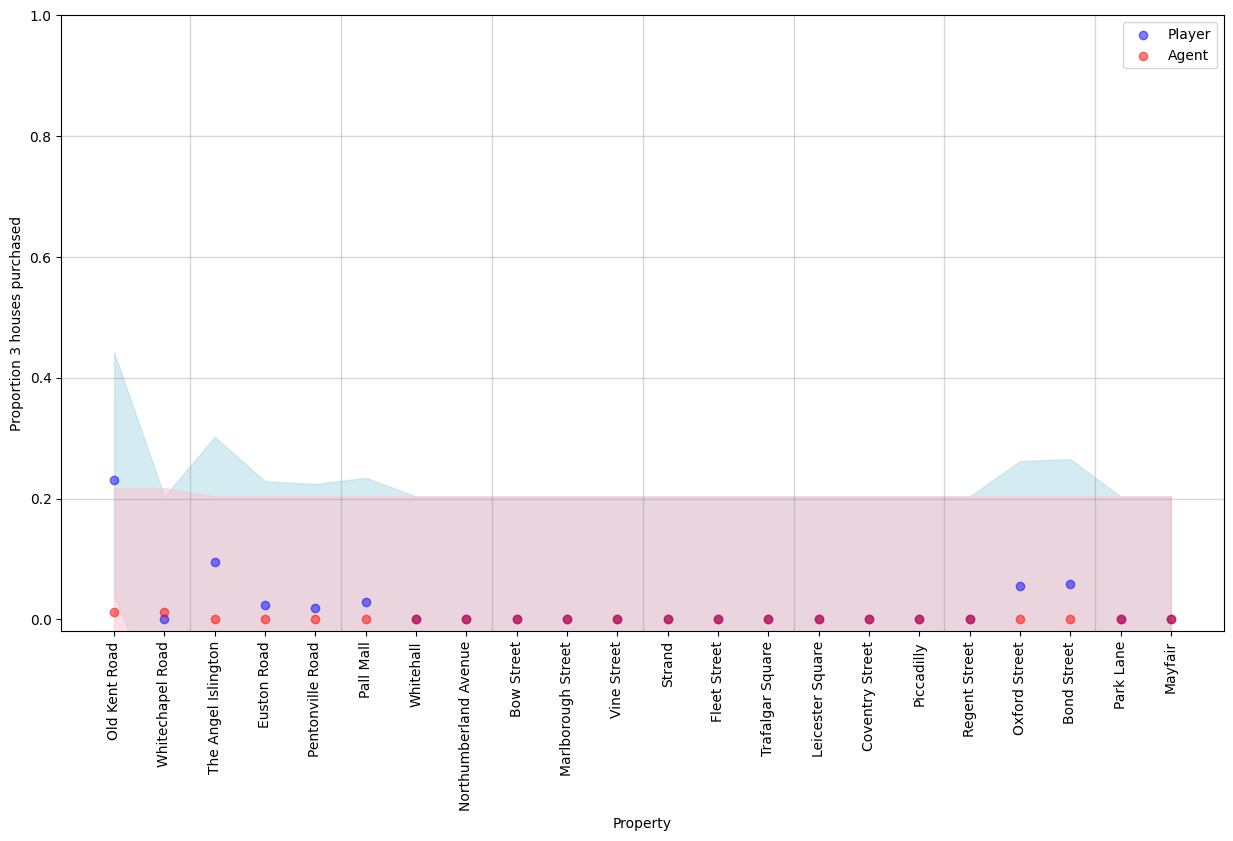

In [306]:
interval_property_plot(houses_bought_agent_3_normalised, houses_bought_player_3_normalised, 'Proportion 3 houses purchased', -0.02, 1)

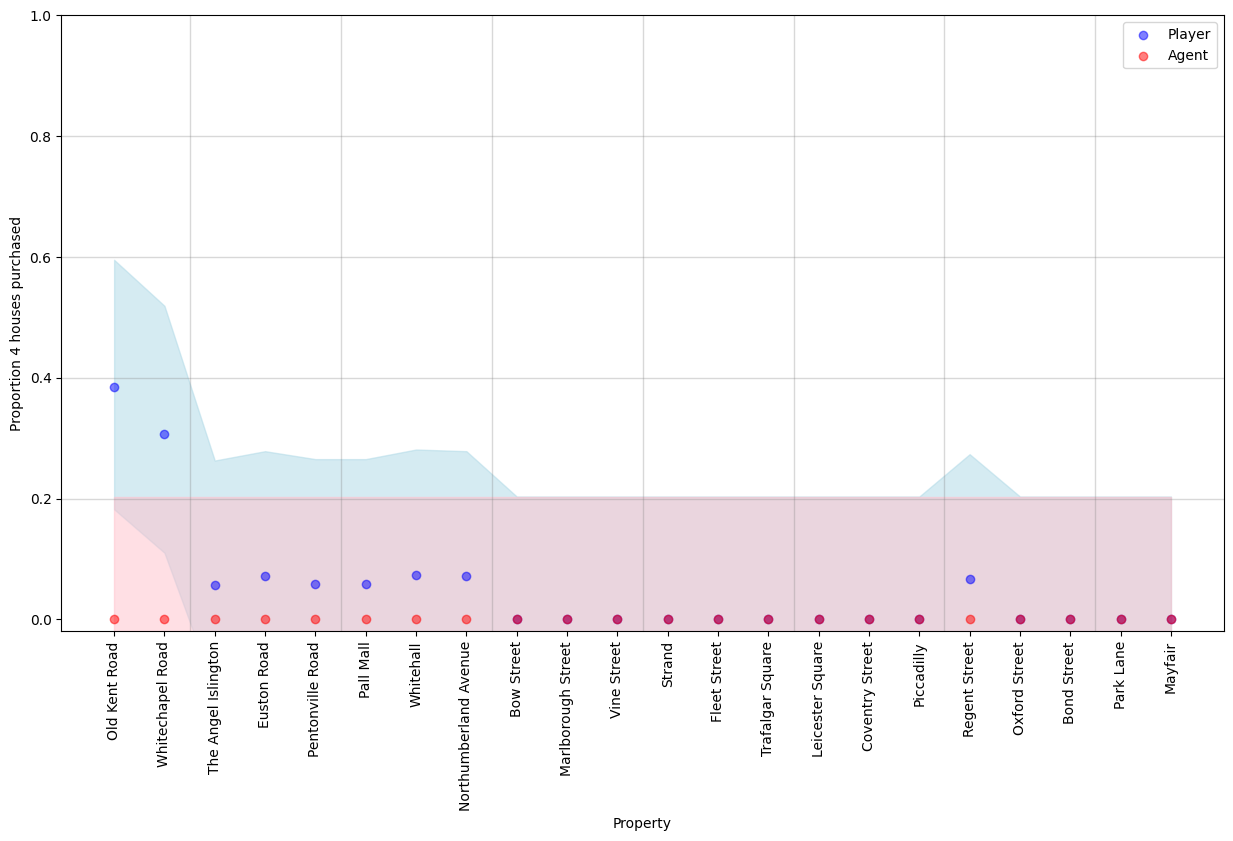

In [307]:
interval_property_plot(houses_bought_agent_4_normalised, houses_bought_player_4_normalised, 'Proportion 4 houses purchased', -0.02, 1)

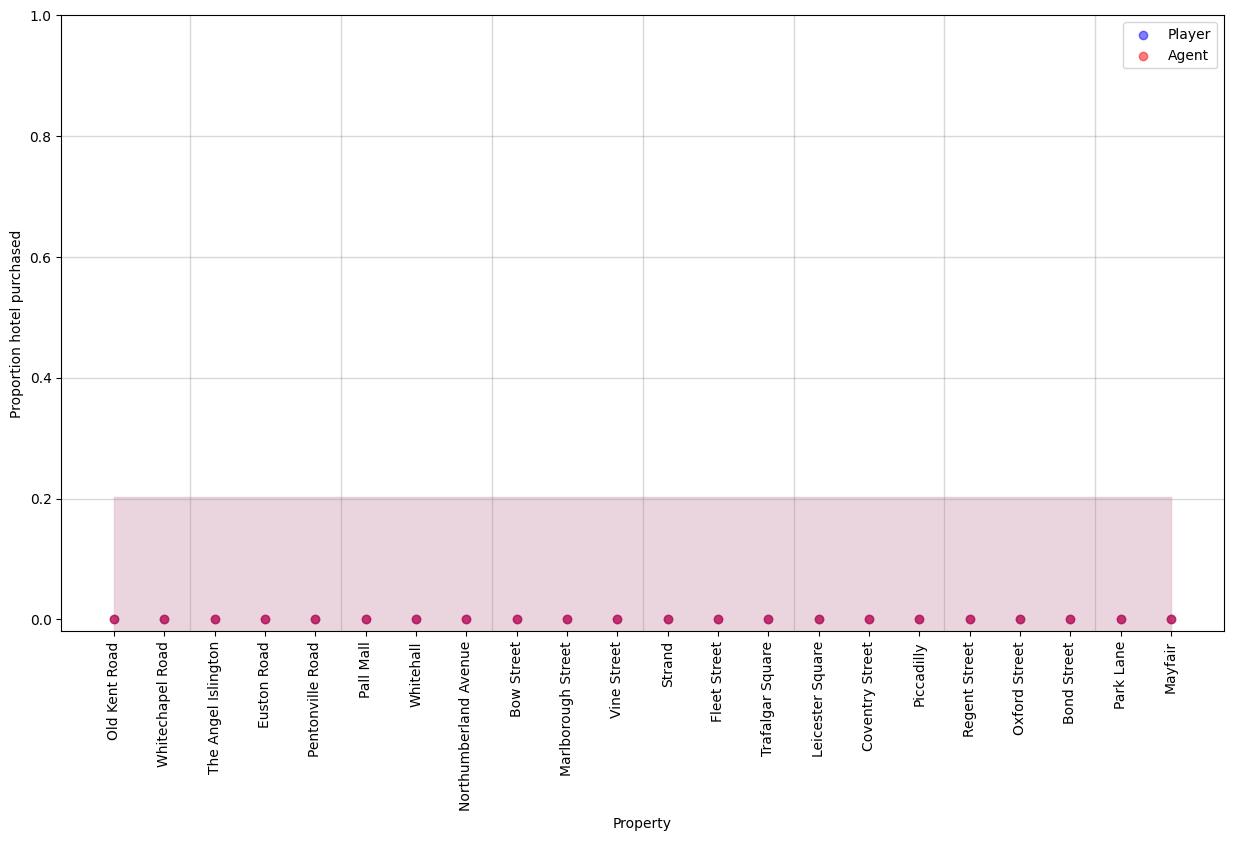

In [308]:
interval_property_plot(hotels_bought_agent_normalised, hotels_bought_player_normalised, 'Proportion hotel purchased', -0.02, 1)

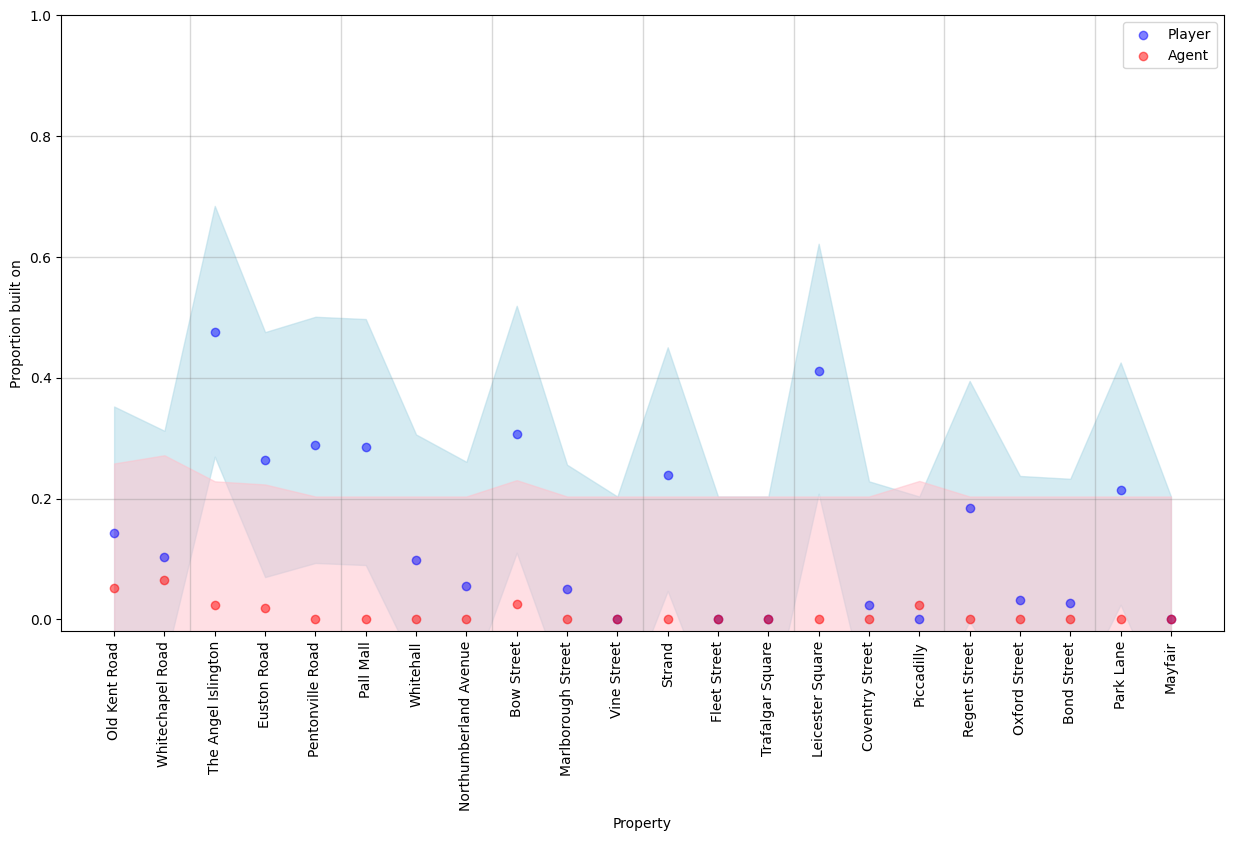

In [309]:
interval_property_plot(built_agent_normalised, built_player_normalised, 'Proportion built on', -0.02, 1)

In [310]:
mortgaged_player = [0]*28
mortgaged_agent = [0]*28

for game in game_outcomes['Properties']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[3]:
            mortgaged_player[idx] += 0.01
        elif prop[0] == 'Agent' and prop[3]:
            mortgaged_agent[idx] += 0.01
        else:
            pass

for game in game_outcomes['Stations']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+22] += 0.01
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+22] += 0.01
        else:
            pass

for game in game_outcomes['Utilities']:
    for idx, prop in enumerate(game):
        if prop[0] == 'Player' and prop[1]:
            mortgaged_player[idx+26] += 0.01
        elif prop[0] == 'Agent' and prop[1]:
            mortgaged_agent[idx+26] += 0.01
        else:
            pass

In [311]:
mortgaged_player_normalised = [mortgaged_player[i]/props_bought_agent[i] for i in range(28)]
mortgaged_agent_normalised = [mortgaged_agent[i]/props_bought_agent[i] for i in range(28)]

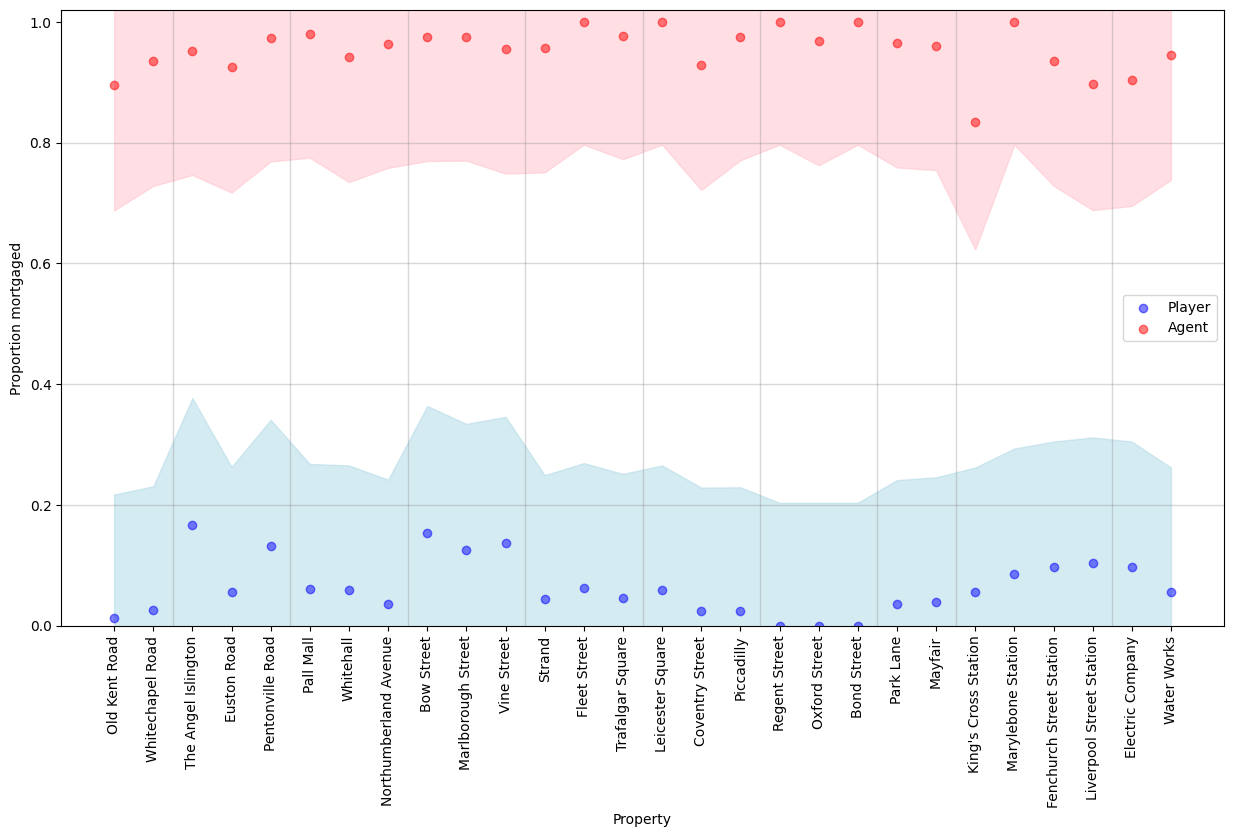

In [312]:
interval_property_plot(mortgaged_agent_normalised, mortgaged_player_normalised, 'Proportion mortgaged', 0, 1.02)

## Analysing Node Actions

In [2]:
file_path = 'MCTS_BaseStrategy_100_node_actions_1.json'
with open(file_path, 'r') as json_file:
    node_actions_100_1 = json.load(json_file)

file_path = 'MCTS_BaseStrategy_100_node_actions_2.json'
with open(file_path, 'r') as json_file:
    node_actions_100_2 = json.load(json_file)

node_actions_100 = node_actions_100_1 + node_actions_100_2

In [3]:
rounds = []
for n in node_actions_100:
    rounds.append(n[-1][-1])

np.mean(rounds), np.median(rounds), min(rounds), max(rounds)

(370.62, 325.0, 12, 953)

### Purchasing Properties

#### Should you purchase property x?

In [4]:
property_names = [
    "Old Kent Road",
    "Whitechapel Road",
    "The Angel Islington",
    "Euston Road",
    "Pentonville Road",
    "Pall Mall",
    "Whitehall",
    "Northumberland Avenue",
    "Bow Street",
    "Marlborough Street",
    "Vine Street",
    "The Strand",
    "Fleet Street",
    "Trafalgar Square",
    "Leicester Square",
    "Coventry Street",
    "Piccadilly",
    "Regent Street",
    "Oxford Street",
    "Bond Street",
    "Park Lane",
    "Mayfair",
    "King's Cross Station",
    "Marylebone Station",
    "Fenchurch St. Station",
    "Liverpool St. Station",
    "Electric Company",
    "Water Works"
]

In [5]:
n = len(property_names)
df_purchase = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [6]:
def populate_df(df, action_prefix):
    for node_actions_game in tqdm(node_actions_100):
        max_round = node_actions_game[-1][-1]
        for action, legal_actions, round in node_actions_game:
            purchase_actions = [legal_action for legal_action in legal_actions if legal_action.startswith(action_prefix)]

            if round < max_round//2:
                if action.startswith(action_prefix):
                    property_name = action[len(action_prefix):].strip()
                    df.loc[df["Property"] == property_name, "Action taken (early game)"] += 1

                if purchase_actions:
                    for purchase_action in purchase_actions:
                        property_name = purchase_action[len(action_prefix):].strip()
                        df.loc[df["Property"] == property_name, "In legal actions (early game)"] += 1

            else:
                if action.startswith(action_prefix):
                    property_name = action[len(action_prefix):].strip()
                    df.loc[df["Property"] == property_name, "Action taken (late game)"] += 1

                if purchase_actions:
                    for purchase_action in purchase_actions:
                        property_name = purchase_action[len(action_prefix):].strip()
                        df.loc[df["Property"] == property_name, "In legal actions (late game)"] += 1

In [7]:
def wilson_score_error(p, n, z=norm.ppf(0.975)):
    z_squared = z**2
    phat = p + z_squared / (2 * n)
    margin_of_error = z * np.sqrt((p * (1 - p) / n) + z_squared / (4 * n))
    error = p - ((phat - margin_of_error) / (1 + z_squared / n))
    return error

In [8]:
populate_df(df_purchase, "Purchase")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:04<00:00, 20.91it/s]


In [9]:
df_purchase['Proportion purchased (early game)'] = df_purchase['Action taken (early game)']/df_purchase['In legal actions (early game)']
df_purchase['Proportion purchased (late game)'] = df_purchase['Action taken (late game)']/df_purchase['In legal actions (late game)']
df_purchase['Error (early game)'] = wilson_score_error(df_purchase['Proportion purchased (early game)'], df_purchase['In legal actions (early game)'])
df_purchase['Error (late game)'] = wilson_score_error(df_purchase['Proportion purchased (early game)'], df_purchase['In legal actions (late game)'])
df_purchase.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion purchased (early game),Proportion purchased (late game),Error (early game),Error (late game)
0,Old Kent Road,652,238,60,17,0.092025,0.071429,0.075577,0.121263
1,Whitechapel Road,503,213,63,14,0.125249,0.065728,0.086869,0.129811
2,The Angel Islington,295,65,39,3,0.132203,0.046154,0.112072,0.217477
3,Euston Road,329,136,47,6,0.142857,0.044118,0.107022,0.160271
4,Pentonville Road,224,61,35,3,0.156250,0.049180,0.128756,0.226359


In [21]:
sorted_df = df_purchase.sort_values(by='Proportion purchased (early game)', ascending=False)
sorted_df[['Property', 'Proportion purchased (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion purchased (early game),Error (early game),In legal actions (early game),Action taken (early game)
24,Fenchurch St. Station,0.256410,0.180477,117,30
11,The Strand,0.215000,0.139121,200,43
27,Water Works,0.208092,0.148289,173,36
23,Marylebone Station,0.189655,0.146738,174,33
10,Vine Street,0.174089,0.124045,247,43
15,Coventry Street,0.172566,0.129173,226,39
17,Regent Street,0.171429,0.133553,210,36
20,Park Lane,0.168831,0.153607,154,26
19,Bond Street,0.163636,0.130267,220,36
18,Oxford Street,0.162921,0.143477,178,29


In [22]:
sorted_df = df_purchase.sort_values(by='Proportion purchased (late game)', ascending=False)
sorted_df[['Property', 'Proportion purchased (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion purchased (late game),Error (late game),In legal actions (late game),Action taken (late game)
23,Marylebone Station,0.400000,0.388353,5,2
20,Park Lane,0.333333,0.382530,6,2
26,Electric Company,0.333333,0.375456,6,2
22,King's Cross Station,0.214286,0.353357,14,3
25,Liverpool St. Station,0.181818,0.361819,11,2
9,Marlborough Street,0.142857,0.285976,28,4
18,Oxford Street,0.125000,0.348536,16,2
13,Trafalgar Square,0.117647,0.333032,17,2
15,Coventry Street,0.107143,0.302596,28,3
11,The Strand,0.107143,0.311722,28,3


In [10]:
def plot_action_proportions(df, y1, y2, ylabel, max_idx=28):
    fig = px.scatter(
        df.loc[:max_idx],
        x='Property',
        y=y1,
        error_y='Error (early game)',
        opacity=0.5
    )

    fig2 = px.scatter(
        df.loc[:max_idx],
        x='Property',
        y=y2,
        error_y='Error (late game)',
        color_discrete_sequence=['red']
    )

    fig.update_traces(
        name='Early Game',  
        showlegend=True
    )

    fig2.update_traces(
        name='Late Game',  
        showlegend=True,
        opacity=0.5
    )

    fig.update_layout(
        yaxis_title=ylabel,
        yaxis=dict(range=[0, 1]),
        xaxis_tickangle=270,
        height=800
    )

    fig.add_trace(fig2.data[0])
    fig.show()

In [11]:
plot_action_proportions(df_purchase, 'Proportion purchased (early game)', 'Proportion purchased (late game)', 'Proportion purchased')

### Building on Properties

#### Should I purchase a house on property x?

In [23]:
n = len(property_names)
df_build_house = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [24]:
populate_df(df_build_house, "Buy house on")

100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


In [25]:
df_build_house['Proportion built house on (early game)'] = df_build_house['Action taken (early game)']/df_build_house['In legal actions (early game)']
df_build_house['Proportion built house on (late game)'] = df_build_house['Action taken (late game)']/df_build_house['In legal actions (late game)']
df_build_house['Error (early game)'] = wilson_score_error(df_build_house['Proportion built house on (early game)'], df_build_house['In legal actions (early game)'])
df_build_house['Error (late game)'] = wilson_score_error(df_build_house['Proportion built house on (early game)'], df_build_house['In legal actions (late game)'])
df_build_house.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion built house on (early game),Proportion built house on (late game),Error (early game),Error (late game)
0,Old Kent Road,16609,33262,1662,3313,0.100066,0.099603,0.015491,0.010967
1,Whitechapel Road,16725,33334,1623,3290,0.097040,0.098698,0.015419,0.010942
2,The Angel Islington,2460,6811,222,580,0.090244,0.085156,0.039645,0.024003
3,Euston Road,2355,6997,208,573,0.088323,0.081892,0.040468,0.023666
4,Pentonville Road,2285,6825,195,573,0.085339,0.083956,0.041016,0.023929


In [26]:
sorted_df = df_build_house.sort_values(by='Proportion built house on (early game)', ascending=False)
sorted_df[['Property', 'Proportion built house on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion built house on (early game),Error (early game),In legal actions (early game),Action taken (early game)
0,Old Kent Road,0.100066,0.015491,16609,1662
1,Whitechapel Road,0.097040,0.015419,16725,1623
18,Oxford Street,0.091743,0.126197,218,20
2,The Angel Islington,0.090244,0.039645,2460,222
21,Mayfair,0.090032,0.107079,311,28
3,Euston Road,0.088323,0.040468,2355,208
20,Park Lane,0.088136,0.109624,295,26
4,Pentonville Road,0.085339,0.041016,2285,195
10,Vine Street,0.077453,0.056820,1162,90
6,Whitehall,0.074233,0.051810,1401,104


In [30]:
sorted_df = df_build_house.sort_values(by='Proportion built house on (late game)', ascending=False)
sorted_df[['Property', 'Proportion built house on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion built house on (late game),Error (late game),In legal actions (late game),Action taken (late game)
0,Old Kent Road,0.099603,0.010967,33262,3313
1,Whitechapel Road,0.098698,0.010942,33334,3290
2,The Angel Islington,0.085156,0.024003,6811,580
4,Pentonville Road,0.083956,0.023929,6825,573
3,Euston Road,0.081892,0.023666,6997,573
20,Park Lane,0.077236,0.119190,246,19
6,Whitehall,0.066780,0.028579,4717,315
19,Bond Street,0.065714,0.099899,350,23
5,Pall Mall,0.064803,0.028781,4614,299
7,Northumberland Avenue,0.063147,0.028810,4640,293


In [31]:
plot_action_proportions(df_build_house, 'Proportion built house on (early game)', 
                        'Proportion built house on (late game)', 'Proportion built house on', 21)

#### A hotel?

In [32]:
n = len(property_names)
df_build_hotel = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [33]:
populate_df(df_build_hotel, "Buy hotel on")

100%|██████████| 100/100 [00:00<00:00, 272.11it/s]


In [34]:
df_build_hotel['Proportion built hotel on (early game)'] = df_build_hotel['Action taken (early game)']/df_build_hotel['In legal actions (early game)']
df_build_hotel['Proportion built hotel on (late game)'] = df_build_hotel['Action taken (late game)']/df_build_hotel['In legal actions (late game)']
df_build_hotel['Error (early game)'] = wilson_score_error(df_build_hotel['Proportion built hotel on (early game)'], df_build_hotel['In legal actions (early game)'])
df_build_hotel['Error (late game)'] = wilson_score_error(df_build_hotel['Proportion built hotel on (early game)'], df_build_hotel['In legal actions (late game)'])
df_build_hotel.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion built hotel on (early game),Proportion built hotel on (late game),Error (early game),Error (late game)
0,Old Kent Road,34,40,4,3,0.117647,0.075000,0.272734,0.258172
1,Whitechapel Road,21,26,4,4,0.190476,0.153846,0.333844,0.313718
2,The Angel Islington,0,0,0,0,NaN,NaN,NaN,NaN
3,Euston Road,0,0,0,0,NaN,NaN,NaN,NaN
4,Pentonville Road,0,0,0,0,NaN,NaN,NaN,NaN


In [35]:
sorted_df = df_build_hotel.sort_values(by='Proportion built hotel on (early game)', ascending=False)
sorted_df[['Property', 'Proportion built hotel on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion built hotel on (early game),Error (early game),In legal actions (early game),Action taken (early game)
1,Whitechapel Road,0.190476,0.333844,21,4
0,Old Kent Road,0.117647,0.272734,34,4
2,The Angel Islington,NaN,NaN,0,0
3,Euston Road,NaN,NaN,0,0
4,Pentonville Road,NaN,NaN,0,0
5,Pall Mall,NaN,NaN,0,0
6,Whitehall,NaN,NaN,0,0
7,Northumberland Avenue,NaN,NaN,0,0
8,Bow Street,NaN,NaN,0,0
9,Marlborough Street,NaN,NaN,0,0


In [36]:
sorted_df = df_build_hotel.sort_values(by='Proportion built hotel on (late game)', ascending=False)
sorted_df[['Property', 'Proportion built hotel on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion built hotel on (late game),Error (late game),In legal actions (late game),Action taken (late game)
1,Whitechapel Road,0.153846,0.313718,26,4
0,Old Kent Road,0.075000,0.258172,40,3
2,The Angel Islington,NaN,NaN,0,0
3,Euston Road,NaN,NaN,0,0
4,Pentonville Road,NaN,NaN,0,0
5,Pall Mall,NaN,NaN,0,0
6,Whitehall,NaN,NaN,0,0
7,Northumberland Avenue,NaN,NaN,0,0
8,Bow Street,NaN,NaN,0,0
9,Marlborough Street,NaN,NaN,0,0


In [37]:
plot_action_proportions(df_build_hotel, 'Proportion built hotel on (early game)', 
                        'Proportion built hotel on (late game)', 'Proportion built hotel on', 21)

#### Should I build on property x?

In [38]:
df_build = pd.DataFrame({'Property': property_names, 
                         'In legal actions (early game)': df_build_house['In legal actions (early game)']+df_build_hotel['In legal actions (early game)'], 
                         'In legal actions (late game)': df_build_house['In legal actions (late game)']+df_build_hotel['In legal actions (late game)'],
                         'Action taken (early game)': df_build_house['Action taken (early game)']+df_build_hotel['Action taken (early game)'], 
                         'Action taken (late game)': df_build_house['Action taken (late game)']+df_build_hotel['Action taken (late game)']})

In [39]:
df_build['Proportion built on (early game)'] = df_build['Action taken (early game)']/df_build['In legal actions (early game)']
df_build['Proportion built on (late game)'] = df_build['Action taken (late game)']/df_build['In legal actions (late game)']
df_build['Error (early game)'] = wilson_score_error(df_build['Proportion built on (early game)'], df_build['In legal actions (early game)'])
df_build['Error (late game)'] = wilson_score_error(df_build['Proportion built on (early game)'], df_build['In legal actions (late game)'])
df_build.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion built on (early game),Proportion built on (late game),Error (early game),Error (late game)
0,Old Kent Road,16643,33302,1666,3316,0.100102,0.099574,0.015475,0.010960
1,Whitechapel Road,16746,33360,1627,3294,0.097158,0.098741,0.015410,0.010938
2,The Angel Islington,2460,6811,222,580,0.090244,0.085156,0.039645,0.024003
3,Euston Road,2355,6997,208,573,0.088323,0.081892,0.040468,0.023666
4,Pentonville Road,2285,6825,195,573,0.085339,0.083956,0.041016,0.023929


In [40]:
sorted_df = df_build.sort_values(by='Proportion built on (early game)', ascending=False)
sorted_df[['Property', 'Proportion built on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion built on (early game),Error (early game),In legal actions (early game),Action taken (early game)
0,Old Kent Road,0.100102,0.015475,16643,1666
1,Whitechapel Road,0.097158,0.015410,16746,1627
18,Oxford Street,0.091743,0.126197,218,20
2,The Angel Islington,0.090244,0.039645,2460,222
21,Mayfair,0.090032,0.107079,311,28
3,Euston Road,0.088323,0.040468,2355,208
20,Park Lane,0.088136,0.109624,295,26
4,Pentonville Road,0.085339,0.041016,2285,195
10,Vine Street,0.077453,0.056820,1162,90
6,Whitehall,0.074233,0.051810,1401,104


In [41]:
sorted_df = df_build.sort_values(by='Proportion built on (late game)', ascending=False)
sorted_df[['Property', 'Proportion built on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion built on (late game),Error (late game),In legal actions (late game),Action taken (late game)
0,Old Kent Road,0.099574,0.010960,33302,3316
1,Whitechapel Road,0.098741,0.010938,33360,3294
2,The Angel Islington,0.085156,0.024003,6811,580
4,Pentonville Road,0.083956,0.023929,6825,573
3,Euston Road,0.081892,0.023666,6997,573
20,Park Lane,0.077236,0.119190,246,19
6,Whitehall,0.066780,0.028579,4717,315
19,Bond Street,0.065714,0.099899,350,23
5,Pall Mall,0.064803,0.028781,4614,299
7,Northumberland Avenue,0.063147,0.028810,4640,293


In [42]:
plot_action_proportions(df_build, 'Proportion built on (early game)', 
                        'Proportion built on (late game)', 'Proportion built on', 21)

### Mortgaging Properties

#### Should I mortgage property x?

In [43]:
n = len(property_names)
df_mortgage = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [44]:
populate_df(df_mortgage, "Mortgage")

100%|██████████| 100/100 [05:52<00:00,  3.53s/it]


In [45]:
df_mortgage['Proportion mortgaged (early game)'] = df_mortgage['Action taken (early game)']/df_mortgage['In legal actions (early game)']
df_mortgage['Proportion mortgaged (late game)'] = df_mortgage['Action taken (late game)']/df_mortgage['In legal actions (late game)']
df_mortgage['Error (early game)'] = wilson_score_error(df_mortgage['Proportion mortgaged (early game)'], df_mortgage['In legal actions (early game)'])
df_mortgage['Error (late game)'] = wilson_score_error(df_mortgage['Proportion mortgaged (early game)'], df_mortgage['In legal actions (late game)'])
df_mortgage.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion mortgaged (early game),Proportion mortgaged (late game),Error (early game),Error (late game)
0,Old Kent Road,16896,43906,2437,25224,0.144235,0.574500,0.015613,0.009706
1,Whitechapel Road,20960,50699,2896,30458,0.138168,0.600761,0.013997,0.009016
2,The Angel Islington,12404,11006,1774,1655,0.143018,0.150373,0.018197,0.019310
3,Euston Road,15416,14057,2164,2139,0.140374,0.152166,0.016319,0.017085
4,Pentonville Road,11306,8296,1509,1218,0.133469,0.146818,0.018990,0.022142


In [46]:
sorted_df = df_mortgage.sort_values(by='Proportion mortgaged (early game)', ascending=False)
sorted_df[['Property', 'Proportion mortgaged (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion mortgaged (early game),Error (early game),In legal actions (early game),Action taken (early game)
0,Old Kent Road,0.144235,0.015613,16896,2437
2,The Angel Islington,0.143018,0.018197,12404,1774
5,Pall Mall,0.140604,0.017638,13186,1854
3,Euston Road,0.140374,0.016319,15416,2164
12,Fleet Street,0.139909,0.019129,11193,1566
15,Coventry Street,0.139892,0.022598,7999,1119
26,Electric Company,0.139729,0.020046,10184,1423
8,Bow Street,0.139204,0.019907,10323,1437
14,Leicester Square,0.138858,0.022388,8145,1131
1,Whitechapel Road,0.138168,0.013997,20960,2896


In [47]:
sorted_df = df_mortgage.sort_values(by='Proportion mortgaged (late game)', ascending=False)
sorted_df[['Property', 'Proportion mortgaged (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion mortgaged (late game),Error (late game),In legal actions (late game),Action taken (late game)
1,Whitechapel Road,0.600761,0.009016,50699,30458
0,Old Kent Road,0.574500,0.009706,43906,25224
5,Pall Mall,0.160559,0.019470,10806,1735
6,Whitehall,0.155922,0.019716,10486,1635
15,Coventry Street,0.154338,0.031572,4069,628
3,Euston Road,0.152166,0.017085,14057,2139
13,Trafalgar Square,0.151349,0.027172,5484,830
27,Water Works,0.151062,0.020812,9420,1423
9,Marlborough Street,0.150629,0.023981,7077,1066
2,The Angel Islington,0.150373,0.019310,11006,1655


In [48]:
plot_action_proportions(df_mortgage, 'Proportion mortgaged (early game)', 
                        'Proportion mortgaged (late game)', 'Proportion mortgaged')

#### Should I unmortgage property x?

In [49]:
n = len(property_names)
df_unmortgage = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [50]:
populate_df(df_unmortgage, "Unmortgage")

100%|██████████| 100/100 [11:37<00:00,  6.98s/it]


In [51]:
df_unmortgage['Proportion unmortgaged (early game)'] = df_unmortgage['Action taken (early game)']/df_unmortgage['In legal actions (early game)']
df_unmortgage['Proportion unmortgaged (late game)'] = df_unmortgage['Action taken (late game)']/df_unmortgage['In legal actions (late game)']
df_unmortgage['Error (early game)'] = wilson_score_error(df_unmortgage['Proportion unmortgaged (early game)'], df_unmortgage['In legal actions (early game)'])
df_unmortgage['Error (late game)'] = wilson_score_error(df_unmortgage['Proportion unmortgaged (early game)'], df_unmortgage['In legal actions (late game)'])
df_unmortgage.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion unmortgaged (early game),Proportion unmortgaged (late game),Error (early game),Error (late game)
0,Old Kent Road,20594,53109,2408,3496,0.116927,0.065827,0.014011,0.008743
1,Whitechapel Road,24503,49211,2863,3739,0.116843,0.075979,0.012851,0.009081
2,The Angel Islington,15081,17000,1748,1642,0.115907,0.096588,0.016352,0.015407
3,Euston Road,20151,20913,2133,2127,0.105851,0.101707,0.014104,0.013846
4,Pentonville Road,14114,13594,1483,1207,0.105073,0.088789,0.016828,0.017145


In [52]:
sorted_df = df_unmortgage.sort_values(by='Proportion unmortgaged (early game)', ascending=False)
sorted_df[['Property', 'Proportion unmortgaged (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion unmortgaged (early game),Error (early game),In legal actions (early game),Action taken (early game)
0,Old Kent Road,0.116927,0.014011,20594,2408
1,Whitechapel Road,0.116843,0.012851,24503,2863
2,The Angel Islington,0.115907,0.016352,15081,1748
3,Euston Road,0.105851,0.014104,20151,2133
6,Whitehall,0.105565,0.014388,19353,2043
4,Pentonville Road,0.105073,0.016828,14114,1483
8,Bow Street,0.105008,0.017256,13418,1409
5,Pall Mall,0.105005,0.015191,17342,1821
26,Electric Company,0.102465,0.017054,13712,1405
21,Mayfair,0.101405,0.026679,5552,563


In [53]:
sorted_df = df_unmortgage.sort_values(by='Proportion unmortgaged (late game)', ascending=False)
sorted_df[['Property', 'Proportion unmortgaged (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion unmortgaged (late game),Error (late game),In legal actions (late game),Action taken (late game)
3,Euston Road,0.101707,0.013846,20913,2127
2,The Angel Islington,0.096588,0.015407,17000,1642
5,Pall Mall,0.094884,0.014856,18138,1721
4,Pentonville Road,0.088789,0.017145,13594,1207
6,Whitehall,0.087274,0.014672,18608,1624
26,Electric Company,0.087184,0.017507,13007,1134
27,Water Works,0.086973,0.015657,16258,1414
7,Northumberland Avenue,0.084710,0.014544,18829,1595
25,Liverpool St. Station,0.078571,0.020138,9711,763
8,Bow Street,0.077767,0.017884,12486,971


In [54]:
plot_action_proportions(df_unmortgage, 'Proportion unmortgaged (early game)', 
                        'Proportion unmortgaged (late game)', 'Proportion unmortgaged')

### Leaving Jail

#### Should you choose to leave jail?

In [72]:
def populate_jail_df(df, action_name):
    for node_actions_game in tqdm(node_actions_100):
        max_round = node_actions_game[-1][-1]
        for action, legal_actions, round in node_actions_game:

            if round < max_round//2:
                if action == action_name:
                    df.loc[df["Type"] == action_name, "Action taken (early game)"] += 1
                if action in legal_actions:
                    df.loc[df["Type"] == action_name, "In legal actions (early game)"] += 1

            else:
                if action == action_name:
                    df.loc[df["Type"] == action_name, "Action taken (late game)"] += 1
                if action in legal_actions:
                    df.loc[df["Type"] == action_name, "In legal actions (late game)"] += 1

In [73]:
leave_jail = ["Use Get Out of Jail Free card", "Pay 50 to get out of jail"]

In [74]:
n = len(leave_jail)
df_jail = pd.DataFrame({'Type': leave_jail, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [75]:
populate_jail_df(df_jail, "Use Get Out of Jail Free card")
populate_jail_df(df_jail, "Pay 50 to get out of jail")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [05:54<00:00,  3.55s/it]


In [76]:
df_jail['Proportion get out of jail (early game)'] = df_jail['Action taken (early game)']/df_jail['In legal actions (early game)']
df_jail['Proportion get out of jail (late game)'] = df_jail['Action taken (late game)']/df_jail['In legal actions (late game)']
df_jail['Error (early game)'] = wilson_score_error(df_jail['Proportion get out of jail (early game)'], df_jail['In legal actions (early game)'])
df_jail['Error (late game)'] = wilson_score_error(df_jail['Proportion get out of jail (early game)'], df_jail['In legal actions (late game)'])
df_jail.head()

,Type,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion get out of jail (early game),Proportion get out of jail (late game),Error (early game),Error (late game)
0,Use Get Out of Jail Free card,113862,342802,168,172,0.001475,0.000502,0.005680,0.003277
1,Pay 50 to get out of jail,113862,342802,1112,1109,0.009766,0.003235,0.005704,0.003291


In [77]:
sorted_df = df_jail.sort_values(by='Proportion get out of jail (early game)', ascending=False)
sorted_df[['Type', 'Proportion get out of jail (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Type,Proportion get out of jail (early game),Error (early game),In legal actions (early game),Action taken (early game)
1,Pay 50 to get out of jail,0.009766,0.005704,113862,1112
0,Use Get Out of Jail Free card,0.001475,0.005680,113862,168


In [81]:
sorted_df = df_jail.sort_values(by='Proportion get out of jail (late game)', ascending=False)
sorted_df[['Type', 'Proportion get out of jail (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Type,Proportion get out of jail (late game),Error (late game),In legal actions (late game),Action taken (late game)
1,Pay 50 to get out of jail,0.003235,0.003291,342802,1109
0,Use Get Out of Jail Free card,0.000502,0.003277,342802,172


In [79]:
def plot_jail_action_proportions(df, y1, y2, ylabel, max_idx=28):
    fig = px.scatter(
        df.loc[:max_idx],
        x='Type',
        y=y1,
        error_y='Error (early game)',
        opacity=0.5
    )

    fig2 = px.scatter(
        df.loc[:max_idx],
        x='Type',
        y=y2,
        error_y='Error (late game)',
        color_discrete_sequence=['red']
    )

    fig.update_traces(
        name='Early Game',  
        showlegend=True
    )

    fig2.update_traces(
        name='Late Game',  
        showlegend=True,
        opacity=0.5
    )

    fig.update_layout(
        yaxis_title=ylabel,
        yaxis=dict(range=[0, 0.02]),
        xaxis=dict(range=[-0.5, 1.5]),
        width=600
    )
    
    fig.add_trace(fig2.data[0])
    fig.show()

In [80]:
plot_jail_action_proportions(df_jail, 'Proportion get out of jail (early game)',
                             'Proportion get out of jail (late game)', 'Proportion get out of jail')

### Selling Buildings

#### Should I sell a house on property x?

In [55]:
n = len(property_names)
df_sell_house = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [56]:
populate_df(df_sell_house, "Sell house on")

100%|██████████| 100/100 [01:59<00:00,  1.19s/it]


In [57]:
df_sell_house['Proportion sold house on (early game)'] = df_sell_house['Action taken (early game)']/df_sell_house['In legal actions (early game)']
df_sell_house['Proportion sold house on (late game)'] = df_sell_house['Action taken (late game)']/df_sell_house['In legal actions (late game)']
df_sell_house['Error (early game)'] = wilson_score_error(df_sell_house['Proportion sold house on (early game)'], df_sell_house['In legal actions (early game)'])
df_sell_house['Error (late game)'] = wilson_score_error(df_sell_house['Proportion sold house on (early game)'], df_sell_house['In legal actions (late game)'])
df_sell_house.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion sold house on (early game),Proportion sold house on (late game),Error (early game),Error (late game)
0,Old Kent Road,11753,25107,1636,7176,0.139199,0.285817,0.018666,0.012799
1,Whitechapel Road,11504,30862,1609,13092,0.139864,0.424211,0.018870,0.011552
2,The Angel Islington,1387,4025,218,583,0.157174,0.144845,0.053917,0.031938
3,Euston Road,1499,3594,204,575,0.136091,0.159989,0.051494,0.033519
4,Pentonville Road,1632,7693,191,4312,0.117034,0.560510,0.049021,0.022844


In [58]:
sorted_df = df_sell_house.sort_values(by='Proportion sold house on (early game)', ascending=False)
sorted_df[['Property', 'Proportion sold house on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion sold house on (early game),Error (early game),In legal actions (early game),Action taken (early game)
19,Bond Street,0.319149,0.273142,47,15
14,Leicester Square,0.212389,0.131325,226,48
15,Coventry Street,0.208333,0.127498,240,50
11,The Strand,0.204433,0.099344,406,83
13,Trafalgar Square,0.200000,0.098720,410,82
21,Mayfair,0.198582,0.162018,141,28
12,Fleet Street,0.189974,0.102095,379,72
17,Regent Street,0.170732,0.202304,82,14
6,Whitehall,0.165846,0.080633,609,101
8,Bow Street,0.164557,0.090870,474,78


In [59]:
sorted_df = df_sell_house.sort_values(by='Proportion sold house on (late game)', ascending=False)
sorted_df[['Property', 'Proportion sold house on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion sold house on (late game),Error (late game),In legal actions (late game),Action taken (late game)
4,Pentonville Road,0.560510,0.022844,7693,4312
1,Whitechapel Road,0.424211,0.011552,30862,13092
0,Old Kent Road,0.285817,0.012799,25107,7176
11,The Strand,0.214000,0.089925,500,107
18,Oxford Street,0.200000,0.223056,60,12
21,Mayfair,0.192982,0.238305,57,11
6,Whitehall,0.178953,0.047910,1777,318
13,Trafalgar Square,0.171073,0.079545,643,110
12,Fleet Street,0.169014,0.079503,639,108
20,Park Lane,0.166667,0.172860,114,19


In [60]:
plot_action_proportions(df_sell_house, 'Proportion sold house on (early game)', 
                        'Proportion sold house on (late game)', 'Proportion sold house on', 21)

#### A hotel?

In [61]:
n = len(property_names)
df_sell_hotel = pd.DataFrame({'Property': property_names, 'In legal actions (early game)': [0]*n, 'In legal actions (late game)': [0]*n,
                   'Action taken (early game)': [0]*n, 'Action taken (late game)': [0]*n})

In [62]:
populate_df(df_sell_hotel, "Buy hotel on")

 31%|███       | 31/100 [00:00<00:00, 148.65it/s]

100%|██████████| 100/100 [00:00<00:00, 127.82it/s]


In [63]:
df_sell_hotel['Proportion sold hotel on (early game)'] = df_sell_hotel['Action taken (early game)']/df_sell_hotel['In legal actions (early game)']
df_sell_hotel['Proportion sold hotel on (late game)'] = df_sell_hotel['Action taken (late game)']/df_sell_hotel['In legal actions (late game)']
df_sell_hotel['Error (early game)'] = wilson_score_error(df_sell_hotel['Proportion sold hotel on (early game)'], df_sell_hotel['In legal actions (early game)'])
df_sell_hotel['Error (late game)'] = wilson_score_error(df_sell_hotel['Proportion sold hotel on (early game)'], df_sell_hotel['In legal actions (late game)'])
df_sell_hotel.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion sold hotel on (early game),Proportion sold hotel on (late game),Error (early game),Error (late game)
0,Old Kent Road,34,40,4,3,0.117647,0.075000,0.272734,0.258172
1,Whitechapel Road,21,26,4,4,0.190476,0.153846,0.333844,0.313718
2,The Angel Islington,0,0,0,0,NaN,NaN,NaN,NaN
3,Euston Road,0,0,0,0,NaN,NaN,NaN,NaN
4,Pentonville Road,0,0,0,0,NaN,NaN,NaN,NaN


In [64]:
sorted_df = df_sell_hotel.sort_values(by='Proportion sold hotel on (early game)', ascending=False)
sorted_df[['Property', 'Proportion sold hotel on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion sold hotel on (early game),Error (early game),In legal actions (early game),Action taken (early game)
1,Whitechapel Road,0.190476,0.333844,21,4
0,Old Kent Road,0.117647,0.272734,34,4
2,The Angel Islington,NaN,NaN,0,0
3,Euston Road,NaN,NaN,0,0
4,Pentonville Road,NaN,NaN,0,0
5,Pall Mall,NaN,NaN,0,0
6,Whitehall,NaN,NaN,0,0
7,Northumberland Avenue,NaN,NaN,0,0
8,Bow Street,NaN,NaN,0,0
9,Marlborough Street,NaN,NaN,0,0


In [65]:
sorted_df = df_sell_hotel.sort_values(by='Proportion sold hotel on (late game)', ascending=False)
sorted_df[['Property', 'Proportion sold hotel on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion sold hotel on (late game),Error (late game),In legal actions (late game),Action taken (late game)
1,Whitechapel Road,0.153846,0.313718,26,4
0,Old Kent Road,0.075000,0.258172,40,3
2,The Angel Islington,NaN,NaN,0,0
3,Euston Road,NaN,NaN,0,0
4,Pentonville Road,NaN,NaN,0,0
5,Pall Mall,NaN,NaN,0,0
6,Whitehall,NaN,NaN,0,0
7,Northumberland Avenue,NaN,NaN,0,0
8,Bow Street,NaN,NaN,0,0
9,Marlborough Street,NaN,NaN,0,0


In [66]:
plot_action_proportions(df_sell_hotel, 'Proportion sold hotel on (early game)', 
                        'Proportion sold hotel on (late game)', 'Proportion sold hotel on', 21)

#### Should I sell on property x?

In [67]:
df_sell = pd.DataFrame({'Property': property_names, 
                         'In legal actions (early game)': df_sell_house['In legal actions (early game)']+df_sell_hotel['In legal actions (early game)'], 
                         'In legal actions (late game)': df_sell_house['In legal actions (late game)']+df_sell_hotel['In legal actions (late game)'],
                         'Action taken (early game)': df_sell_house['Action taken (early game)']+df_sell_hotel['Action taken (early game)'], 
                         'Action taken (late game)': df_sell_house['Action taken (late game)']+df_sell_hotel['Action taken (late game)']})

In [68]:
df_sell['Proportion sold on (early game)'] = df_sell['Action taken (early game)']/df_sell['In legal actions (early game)']
df_sell['Proportion sold on (late game)'] = df_sell['Action taken (late game)']/df_sell['In legal actions (late game)']
df_sell['Error (early game)'] = wilson_score_error(df_sell['Proportion sold on (early game)'], df_sell['In legal actions (early game)'])
df_sell['Error (late game)'] = wilson_score_error(df_sell['Proportion sold on (early game)'], df_sell['In legal actions (late game)'])
df_sell.head()

,Property,In legal actions (early game),In legal actions (late game),Action taken (early game),Action taken (late game),Proportion sold on (early game),Proportion sold on (late game),Error (early game),Error (late game)
0,Old Kent Road,11787,25147,1640,7179,0.139136,0.285481,0.018639,0.012788
1,Whitechapel Road,11525,30888,1613,13096,0.139957,0.423983,0.018853,0.011547
2,The Angel Islington,1387,4025,218,583,0.157174,0.144845,0.053917,0.031938
3,Euston Road,1499,3594,204,575,0.136091,0.159989,0.051494,0.033519
4,Pentonville Road,1632,7693,191,4312,0.117034,0.560510,0.049021,0.022844


In [69]:
sorted_df = df_sell.sort_values(by='Proportion sold on (early game)', ascending=False)
sorted_df[['Property', 'Proportion sold on (early game)', 'Error (early game)', 
           'In legal actions (early game)', 'Action taken (early game)']]

,Property,Proportion sold on (early game),Error (early game),In legal actions (early game),Action taken (early game)
19,Bond Street,0.319149,0.273142,47,15
14,Leicester Square,0.212389,0.131325,226,48
15,Coventry Street,0.208333,0.127498,240,50
11,The Strand,0.204433,0.099344,406,83
13,Trafalgar Square,0.200000,0.098720,410,82
21,Mayfair,0.198582,0.162018,141,28
12,Fleet Street,0.189974,0.102095,379,72
17,Regent Street,0.170732,0.202304,82,14
6,Whitehall,0.165846,0.080633,609,101
8,Bow Street,0.164557,0.090870,474,78


In [70]:
sorted_df = df_sell.sort_values(by='Proportion sold on (late game)', ascending=False)
sorted_df[['Property', 'Proportion sold on (late game)', 'Error (late game)', 
           'In legal actions (late game)', 'Action taken (late game)']]

,Property,Proportion sold on (late game),Error (late game),In legal actions (late game),Action taken (late game)
4,Pentonville Road,0.560510,0.022844,7693,4312
1,Whitechapel Road,0.423983,0.011547,30888,13096
0,Old Kent Road,0.285481,0.012788,25147,7179
11,The Strand,0.214000,0.089925,500,107
18,Oxford Street,0.200000,0.223056,60,12
21,Mayfair,0.192982,0.238305,57,11
6,Whitehall,0.178953,0.047910,1777,318
13,Trafalgar Square,0.171073,0.079545,643,110
12,Fleet Street,0.169014,0.079503,639,108
20,Park Lane,0.166667,0.172860,114,19


In [71]:
plot_action_proportions(df_sell, 'Proportion sold on (early game)', 
                        'Proportion sold on (late game)', 'Proportion sold on', 21)